# Computational Social Science Project #2 

**Name:** Miray Salman

*Semester:* Fall 2023


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [1]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [2]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 

diabetes = pd.read_csv("C:/Users/MSalman/Desktop/courses/2023-08_Fall/CSS/Computational-Social-Science-Training-Program-copy1/Projects/Project 2/Diabetes with Population Info by County 2017.csv", 
                       dtype={"CountyFIPS": str}) 

In [3]:
diabetes = diabetes.dropna(how='any')

In [4]:
#
# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 

shape:  (3220, 95)


In [5]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df 
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [6]:
# identify columns with non-numeric features
non_numeric_features = diabetes.select_dtypes(exclude=['number'])

# List the names of non-numeric columns
non_numeric_column_names = non_numeric_features.columns.tolist()

# Print or inspect the non-numeric column names
print("Non-Numeric Features:")
print(non_numeric_column_names)

Non-Numeric Features:
['County', 'State', 'CountyFIPS', 'Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number', 'sex and age_total population_65 years and over_sex ratio (males per 100 females)']


In [7]:
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes['Diabetes_Number'].str.isnumeric()]['Diabetes_Number'].unique())


['Suppressed']


In [8]:
#
# Now do the same as above, but for "Obesity_Number"
print(diabetes[~diabetes['Obesity_Number'].str.isnumeric()]['Obesity_Number'].unique())

['No Data']


In [9]:
#
# Now do the same as above, but for "Physical_Inactivity_Number" 
print(diabetes[~diabetes['Physical_Inactivity_Number'].str.isnumeric()]['Physical_Inactivity_Number'].unique())


['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [10]:
#
# Recode variables
# import relevant library
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

columns_to_convert = ['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']
diabetes[['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']] = diabetes[['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']].apply(pd.to_numeric, errors='coerce')

In [11]:
# Since I will not be able to convert non-finite values in columns to integers, I'm going to drop them from the data-set 
diabetes = diabetes.dropna(subset=['Diabetes_Number']).astype({'Diabetes_Number': 'int'})
diabetes = diabetes[~diabetes['Diabetes_Number'].isin([float('inf'), float('-inf')])]
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype('int')

diabetes = diabetes.dropna(subset=['Obesity_Number']).astype({'Obesity_Number': 'int'})
diabetes = diabetes[~diabetes['Obesity_Number'].isin([float('inf'), float('-inf')])]
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype('int')

diabetes = diabetes.dropna(subset=['Physical_Inactivity_Number']).astype({'Physical_Inactivity_Number': 'int'})
diabetes = diabetes[~diabetes['Physical_Inactivity_Number'].isin([float('inf'), float('-inf')])]
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype('int')

In [12]:
#
# Recode variables

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype(int) 

# Obesity
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype(int) 

# Physical Inactivity
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype(int) 

In [13]:
# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
# Since there are decimal parts in the data. Therefore, I'll make it float. 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype(float)

We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [14]:
#
# Scale to county populations
#-----------

# select count variables to recode to percentages; make sure we leave out ratios and our population variable 
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
           
# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)


Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [15]:
#
# check
#-----------
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

,count,mean,min,max
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00
race_total population_one race_black or african american,3112.0,0.090215,0.000000,8.741228e-01


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [16]:
#
# Check for duplicate columns
#-----------
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['race_total population_one race_1',
 'sex and age_total population',
 'race_total population_two or more races_1',
 'sex and age_total population_65 years and over_1',
 'sex and age_total population_18 years and over_1',
 'hispanic or latino and race_total population']

In [17]:
#
# drop columns from duplicates list
#-----------
# now drop list of duplicate features from our df using the .drop() method

duplicate_columns_to_drop = [
    'race_total population_two or more races_1',
    'hispanic or latino and race_total population',
    'sex and age_total population',
    'sex and age_total population_65 years and over_1',
    'race_total population_one race_1',
    'sex and age_total population_18 years and over_1']

diabetes = diabetes.drop(columns=duplicate_columns_to_drop)


Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [18]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
print(diabetes)


                 County    State CountyFIPS  Diabetes_Number  Obesity_Number  \
0        Autauga County  Alabama      01001         0.093804        0.244366   
1        Baldwin County  Alabama      01003         0.080281        0.233255   
2        Barbour County  Alabama      01005         0.131875        0.310643   
3           Bibb County  Alabama      01007         0.105251        0.290052   
4         Blount County  Alabama      01009         0.108977        0.246804   
...                 ...      ...        ...              ...             ...   
3215  Sweetwater County  Wyoming      56037         0.058028        0.212208   
3216       Teton County  Wyoming      56039         0.019038        0.088946   
3217       Uinta County  Wyoming      56041         0.069872        0.238973   
3218    Washakie County  Wyoming      56043         0.078361        0.213802   
3219      Weston County  Wyoming      56045         0.084648        0.283803   

      Physical_Inactivity_Number  \
0  

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

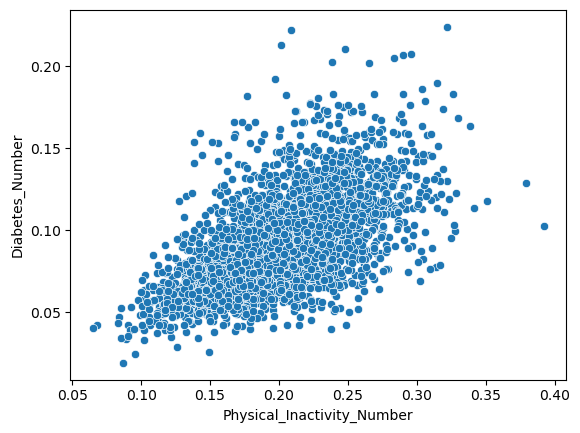

In [19]:
#
# EDA #1 and interpretations in this section 
#-----------
# This scatterplot looks at the relationship Physical_Inactivity_Number and Diabetes_Number
sns.scatterplot(x = "Physical_Inactivity_Number",
                y = "Diabetes_Number",
                data = diabetes);


In [20]:
# print out the dataframe's records and features
print(f"dataset has {diabetes.shape[0]} rows and {diabetes.shape[1]} columns")

dataset has 3112 rows and 90 columns


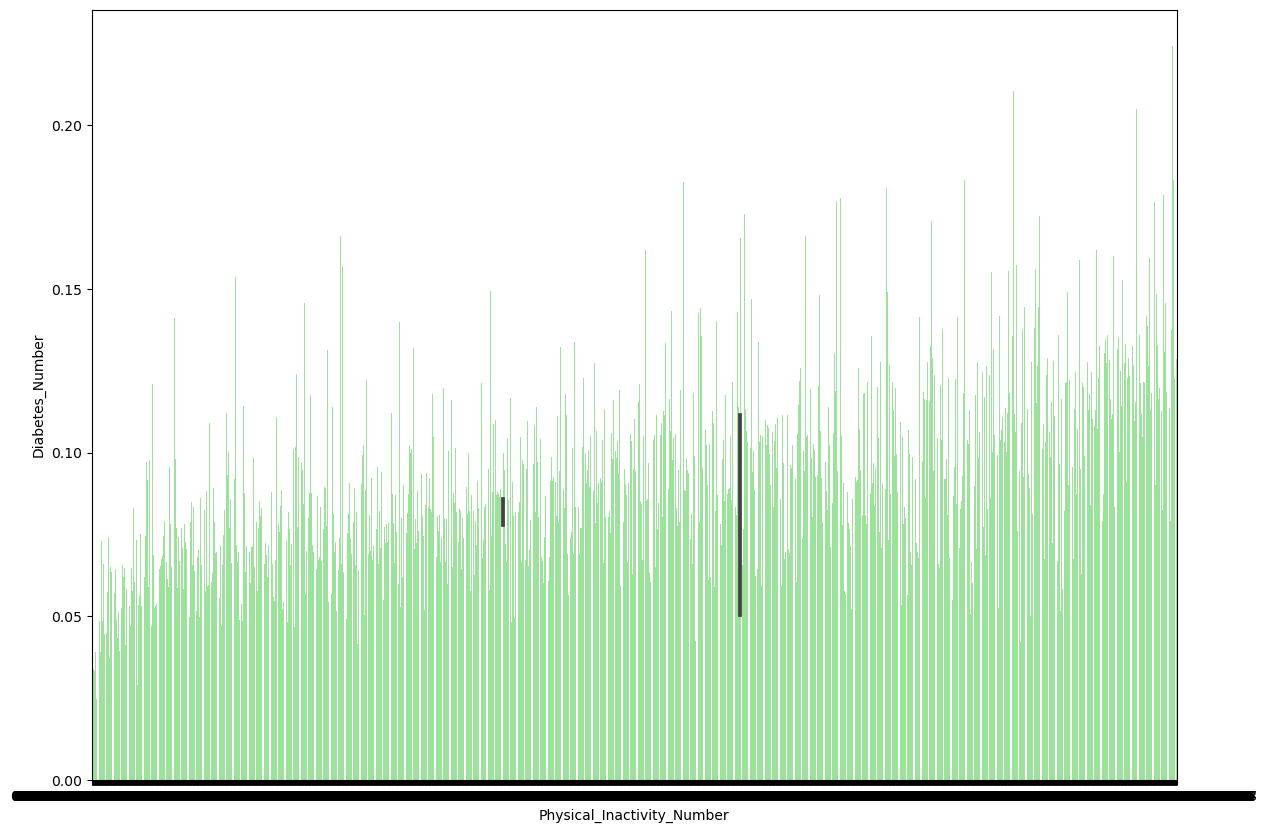

In [21]:
#
# EDA #2 and interpretations in this section 
#-----------
# Stretch the bar plot
plt.figure(figsize=(14, 10))  

# This barplot looks at the relationship between Physical_Inactivity_Number and Diabetes_Number
sns.barplot(x = "Physical_Inactivity_Number", 
            y = "Diabetes_Number", 
            data = diabetes, 
            color = "lightgreen");


In [22]:
# print out the dataframe's records and features
print(f"dataset has {diabetes.shape[0]} rows and {diabetes.shape[1]} columns")

dataset has 3112 rows and 90 columns


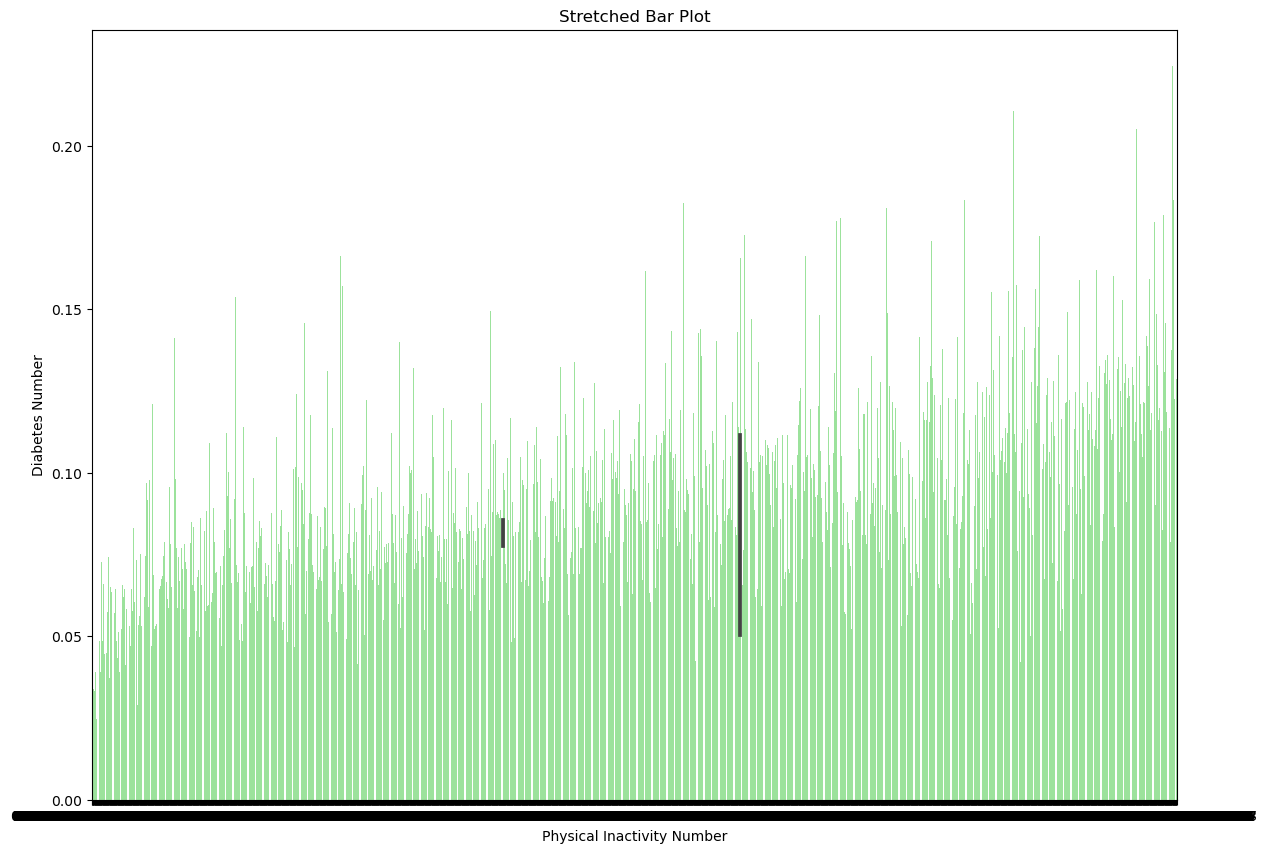

In [23]:
# Stretch the bar plot
plt.figure(figsize=(14, 10))  

# Create the bar plot
sns.barplot(x="Physical_Inactivity_Number",
            y="Diabetes_Number",
            data=diabetes,
            color="lightgreen")

# Add labels and title (optional)
plt.xlabel('Physical Inactivity Number')
plt.ylabel('Diabetes Number')
plt.title('Stretched Bar Plot')  # You can add a title if desired

# Show the plot
plt.show()

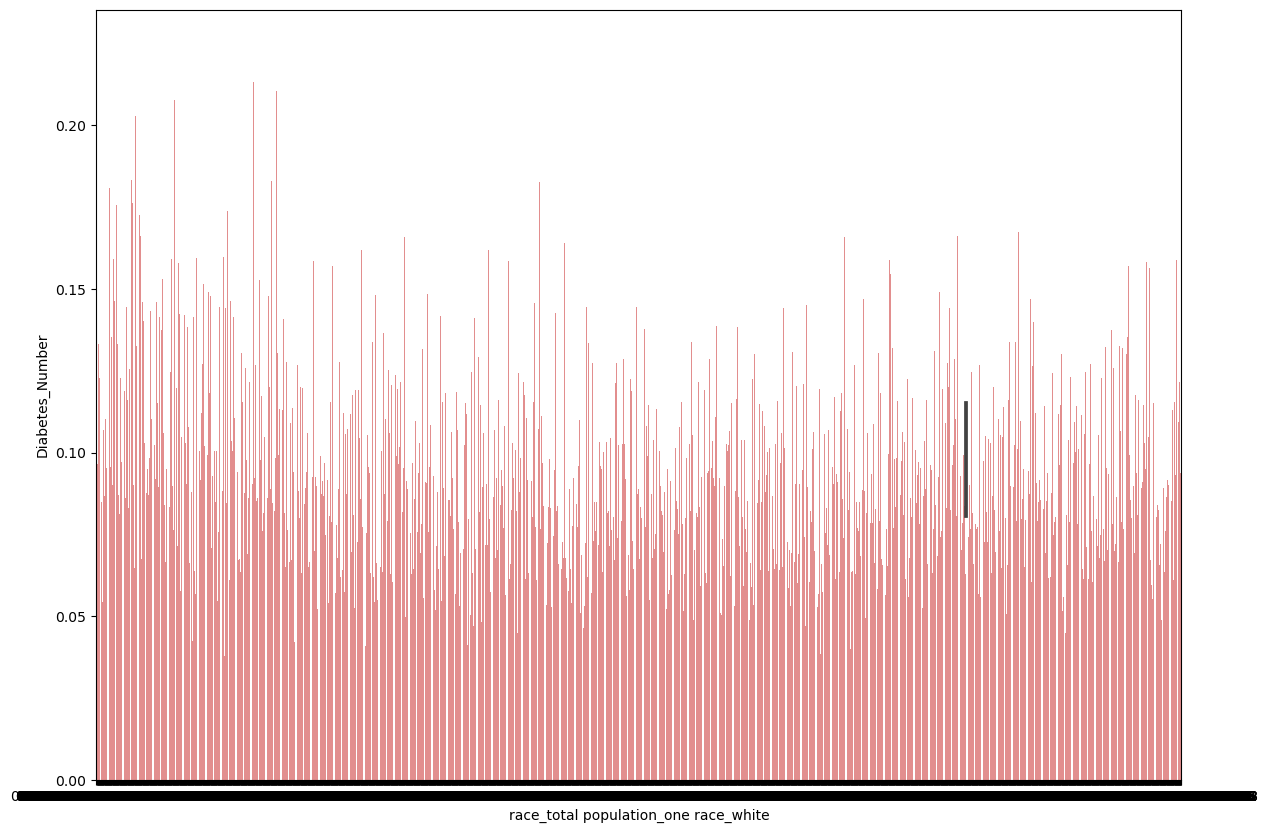

In [24]:
#
# EDA #2 and interpretations in this section 
#-----------
# Stretch the bar plot
plt.figure(figsize=(14, 10))  
# This barplot looks at the relationship between race_total population_one race_white and Diabetes_Number
sns.barplot(x = "race_total population_one race_white", 
            y = "Diabetes_Number", 
            data = diabetes, 
            color = "lightcoral");


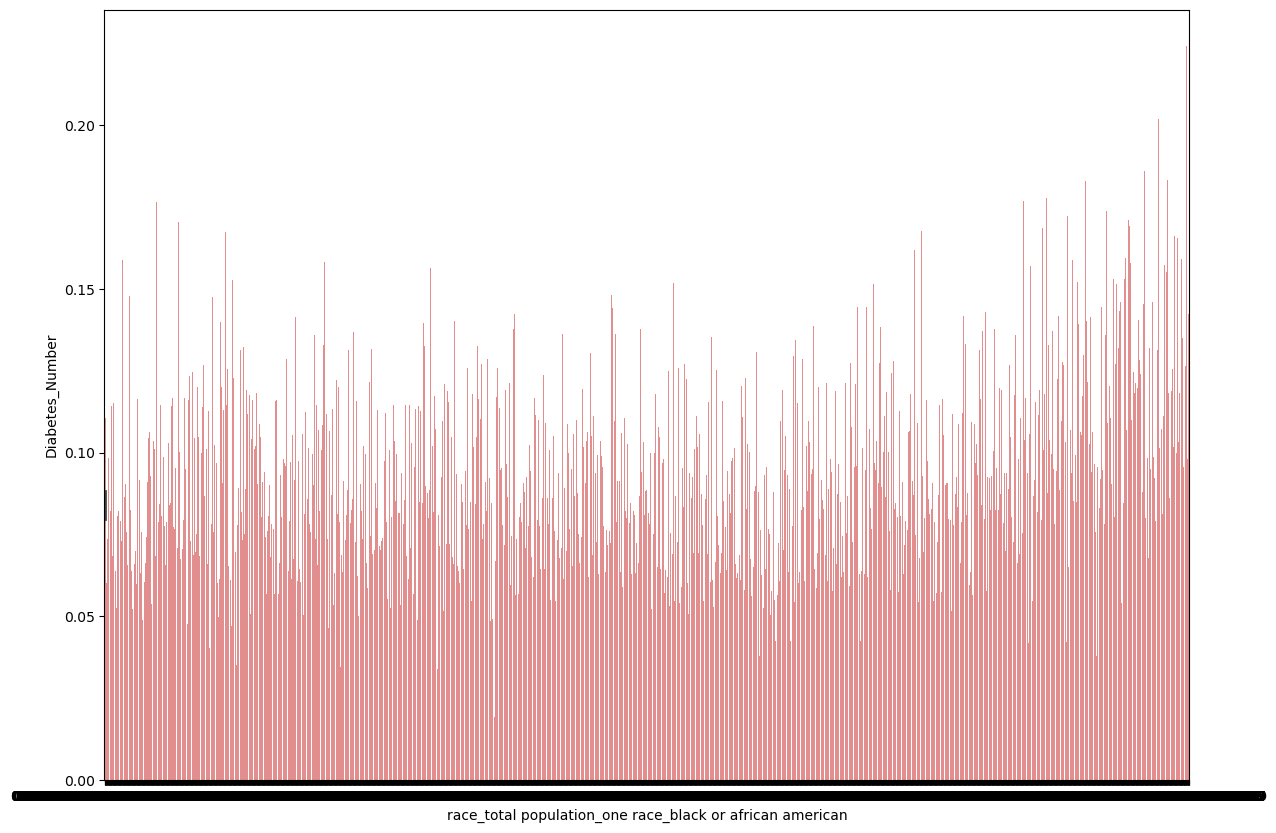

In [25]:
#
# EDA #2 and interpretations in this section 
#-----------
# Stretch the bar plot
plt.figure(figsize=(14, 10))  
# This barplot looks at the relationship between race_total population_one race_black or african american and Diabetes_Number
sns.barplot(x = "race_total population_one race_black or african american", 
            y = "Diabetes_Number", 
            data = diabetes, 
            color = "lightcoral");

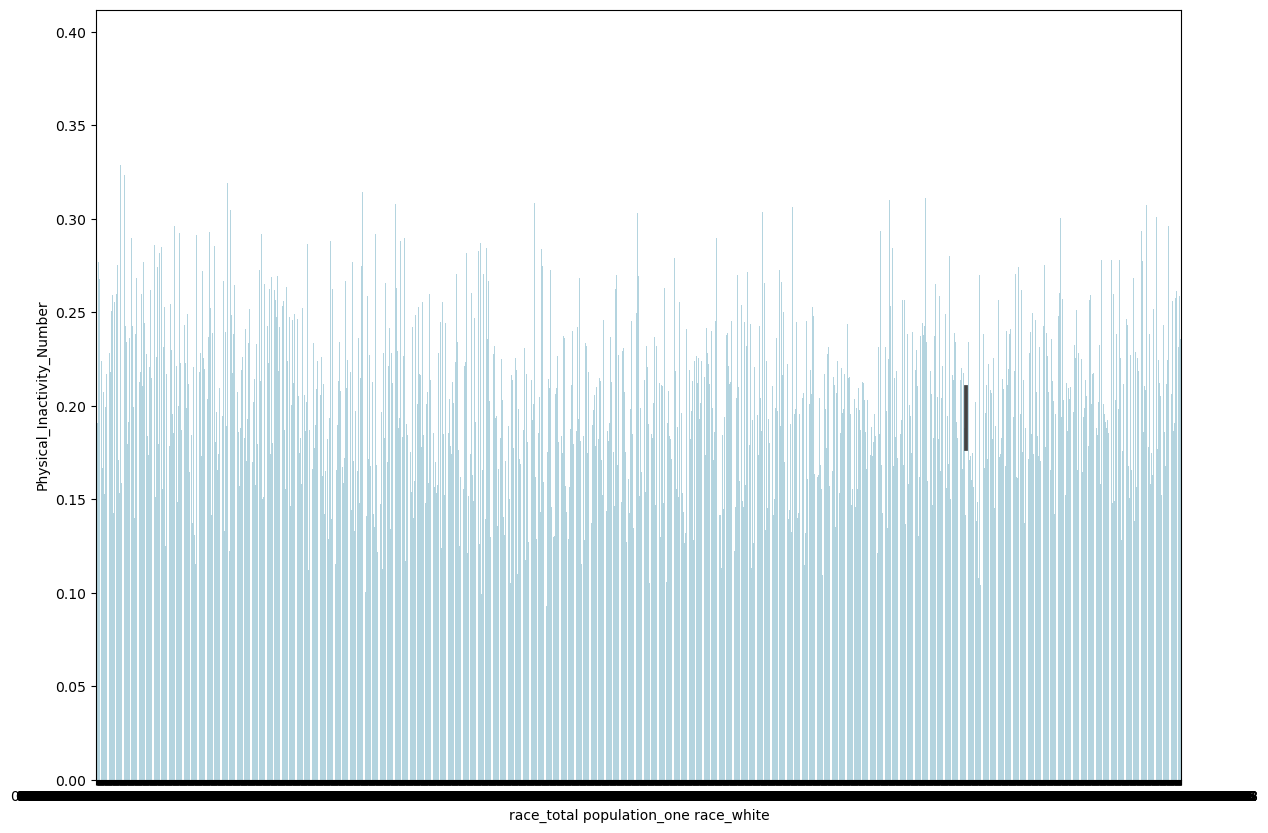

In [26]:
#
# EDA #2 and interpretations in this section 
#-----------
# Stretch the bar plot
plt.figure(figsize=(14, 10))  
# This barplot looks at the relationship between race_total population_one race_white and Physical_Inactivity_Number
sns.barplot(x = "race_total population_one race_white", 
            y = "Physical_Inactivity_Number", 
            data = diabetes, 
            color = "lightblue");

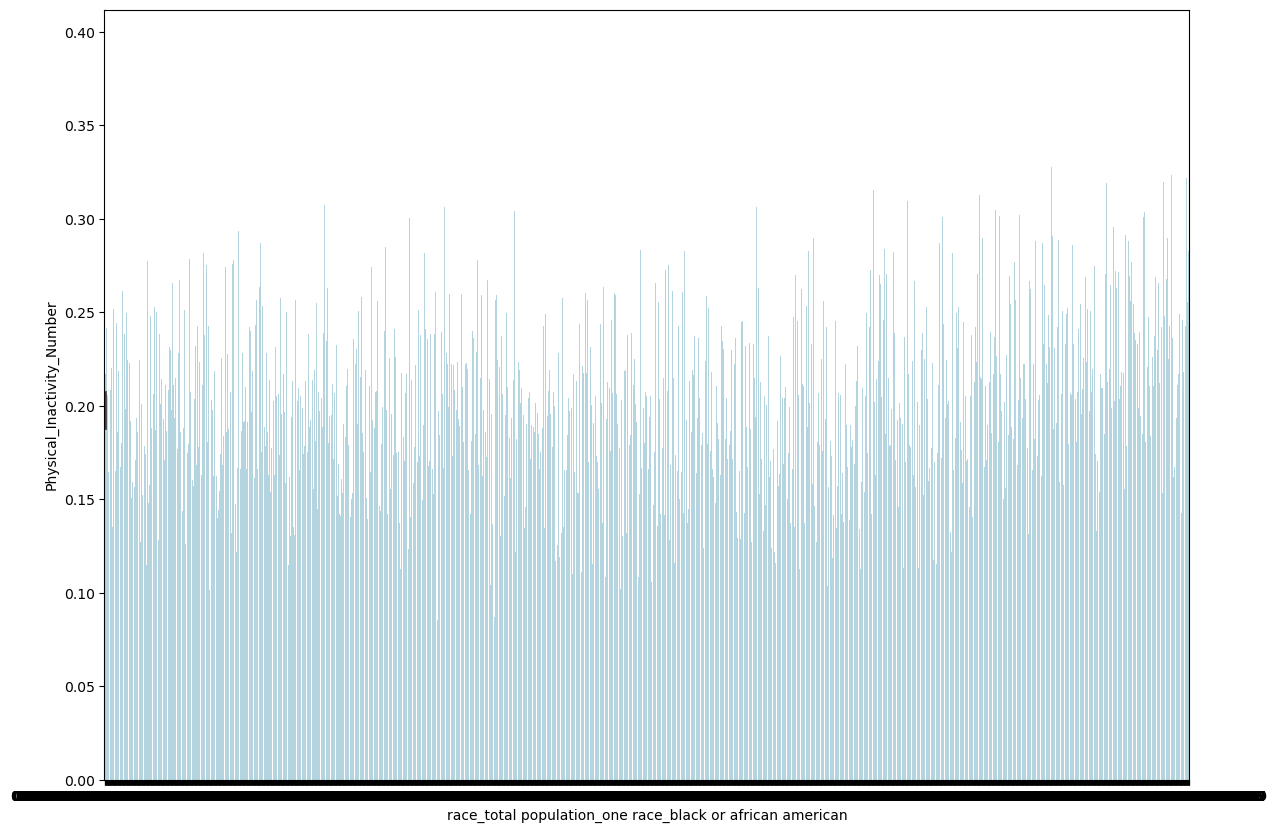

In [27]:
#
# EDA #2 and interpretations in this section 
#-----------
# Stretch the bar plot
plt.figure(figsize=(14, 10))  
# This barplot looks at the relationship between race_total population_one race_black or african american and Physical_Inactivity_Number
sns.barplot(x = "race_total population_one race_black or african american", 
            y = "Physical_Inactivity_Number", 
            data = diabetes, 
            color = "lightblue");

## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [28]:
#
# Drop and get dummies
#-----------

# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ['Region'],  
                               drop_first = True) # drop the first as a reference 


# drop 'County' and 'State' variables, and a bunch of others
diabetes_clean = diabetes_clean.drop(labels = ['County', 'State',
                                               'sex and age_total population_male',
                                               'sex and age_total population_female', 
                                               'sex and age_total population_sex ratio (males per 100 females)',
                                               'sex and age_total population_under 5 years',
                                               'sex and age_total population_5 to 9 years',
                                               'sex and age_total population_10 to 14 years',
                                               'sex and age_total population_15 to 19 years',
                                               'sex and age_total population_20 to 24 years',
                                               'sex and age_total population_25 to 34 years',
                                               'sex and age_total population_35 to 44 years',
                                               'sex and age_total population_45 to 54 years',
                                               'sex and age_total population_55 to 59 years',
                                               'sex and age_total population_60 to 64 years',
                                               'sex and age_total population_65 to 74 years',
                                               'sex and age_total population_75 to 84 years',
                                               'sex and age_total population_85 years and over',
                                               'sex and age_total population_median age (years)', 
                                               'sex and age_total population_under 18 years',
                                               'sex and age_total population_16 years and over',
                                               'sex and age_total population_18 years and over',
                                               'sex and age_total population_21 years and over',
                                               'sex and age_total population_62 years and over',
                                               'sex and age_total population_65 years and over',
                                               'sex and age_total population_18 years and over_male',
                                               'sex and age_total population_18 years and over_female',
                                               'sex and age_total population_18 years and over_sex ratio (males per 100 females)',
                                               'sex and age_total population_65 years and over_male',
                                               'sex and age_total population_65 years and over_female'],
                               axis = 1) # which axis tells python we want to drop columns rather than index rows?

# look at first 10 rows of new data frame 
diabetes_clean.head(10) 

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [29]:
print("Diabetes_Number" in diabetes_clean)

True


In [30]:
diabetes_clean = diabetes_clean.dropna(how='any')

In [31]:
#
# Partition data
#-----------

# import library
from sklearn.model_selection import train_test_split

# create y dataframe
y = diabetes_clean.Diabetes_Number


In [32]:
# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
X = diabetes_clean.drop(["Diabetes_Number", 
               "race alone or in combination with one or more other races_total population"], # list of variables to drop
               axis= 1)   # which axis do we want to specify here

Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

In [33]:
#
# Feature selection (see above)
#-----------


In [34]:
#
# Training/test split
#-----------

# set the random seed
np.random.seed(10)


# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=0.8,      # specify proportional split for training
                                                    test_size=0.2)       # specify proportional split for test

In [35]:
#
# Validation split
#-----------

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 
X_train, X_validate, y_train, y_validate =  train_test_split(X_train, 
                                                            y_train,
                                                            train_size=0.8, 
                                                            test_size=0.2)

In [36]:
#
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very high penalty (very low, like alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** ...

### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1:  (OLS) 

In [37]:
#
# Model 1 training
#-----------


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
# create a model
lin_reg = LinearRegression()

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

In [40]:
# print model coefficients and intercept
print(lin_model.coef_)
print(lin_model.intercept_)

[-3.93845072e-08  8.45461937e-03  7.89540777e-03  1.50286164e-04
  4.58060347e-04 -6.26201604e-03  6.26201604e-03 -3.08421874e-02
  1.10157242e-02  3.94473809e-02  1.25240372e-03  9.17732475e-05
  7.28367179e-04  1.57137296e-03  1.14587543e-02  7.21216377e-03
  8.80166546e-03  1.13221877e-02  6.10572822e-03  2.94279219e-03
  3.19997810e-03  6.61044516e-03 -3.87858434e-04 -1.22089628e-04
 -3.87767819e-05 -5.21109318e-04 -6.93784127e-04  4.29552468e-03
 -2.66525077e-03 -3.31989086e-03 -1.44946611e-03 -2.94180470e-04
 -3.77295383e-02 -5.15956487e-02 -5.70567121e-02 -4.06524969e-02
 -2.46741394e-03 -2.11001661e-02  2.91985848e-03  3.47929138e-03
 -6.03169205e-04 -3.72068904e-04 -5.31788394e-04 -2.91985848e-03
  1.05797765e-02 -7.68034086e-03 -1.27894934e-02 -1.82362729e-02
  2.50372442e-03  3.96792770e-04  1.42959347e-03 -2.62256781e-04
  1.45117324e-03  9.18102225e-04  1.98140249e-03  1.34157043e-05
  3.21174935e-03  4.56422763e-03  7.86814359e-03  1.07470725e-02
  4.18422987e-03]
0.08979

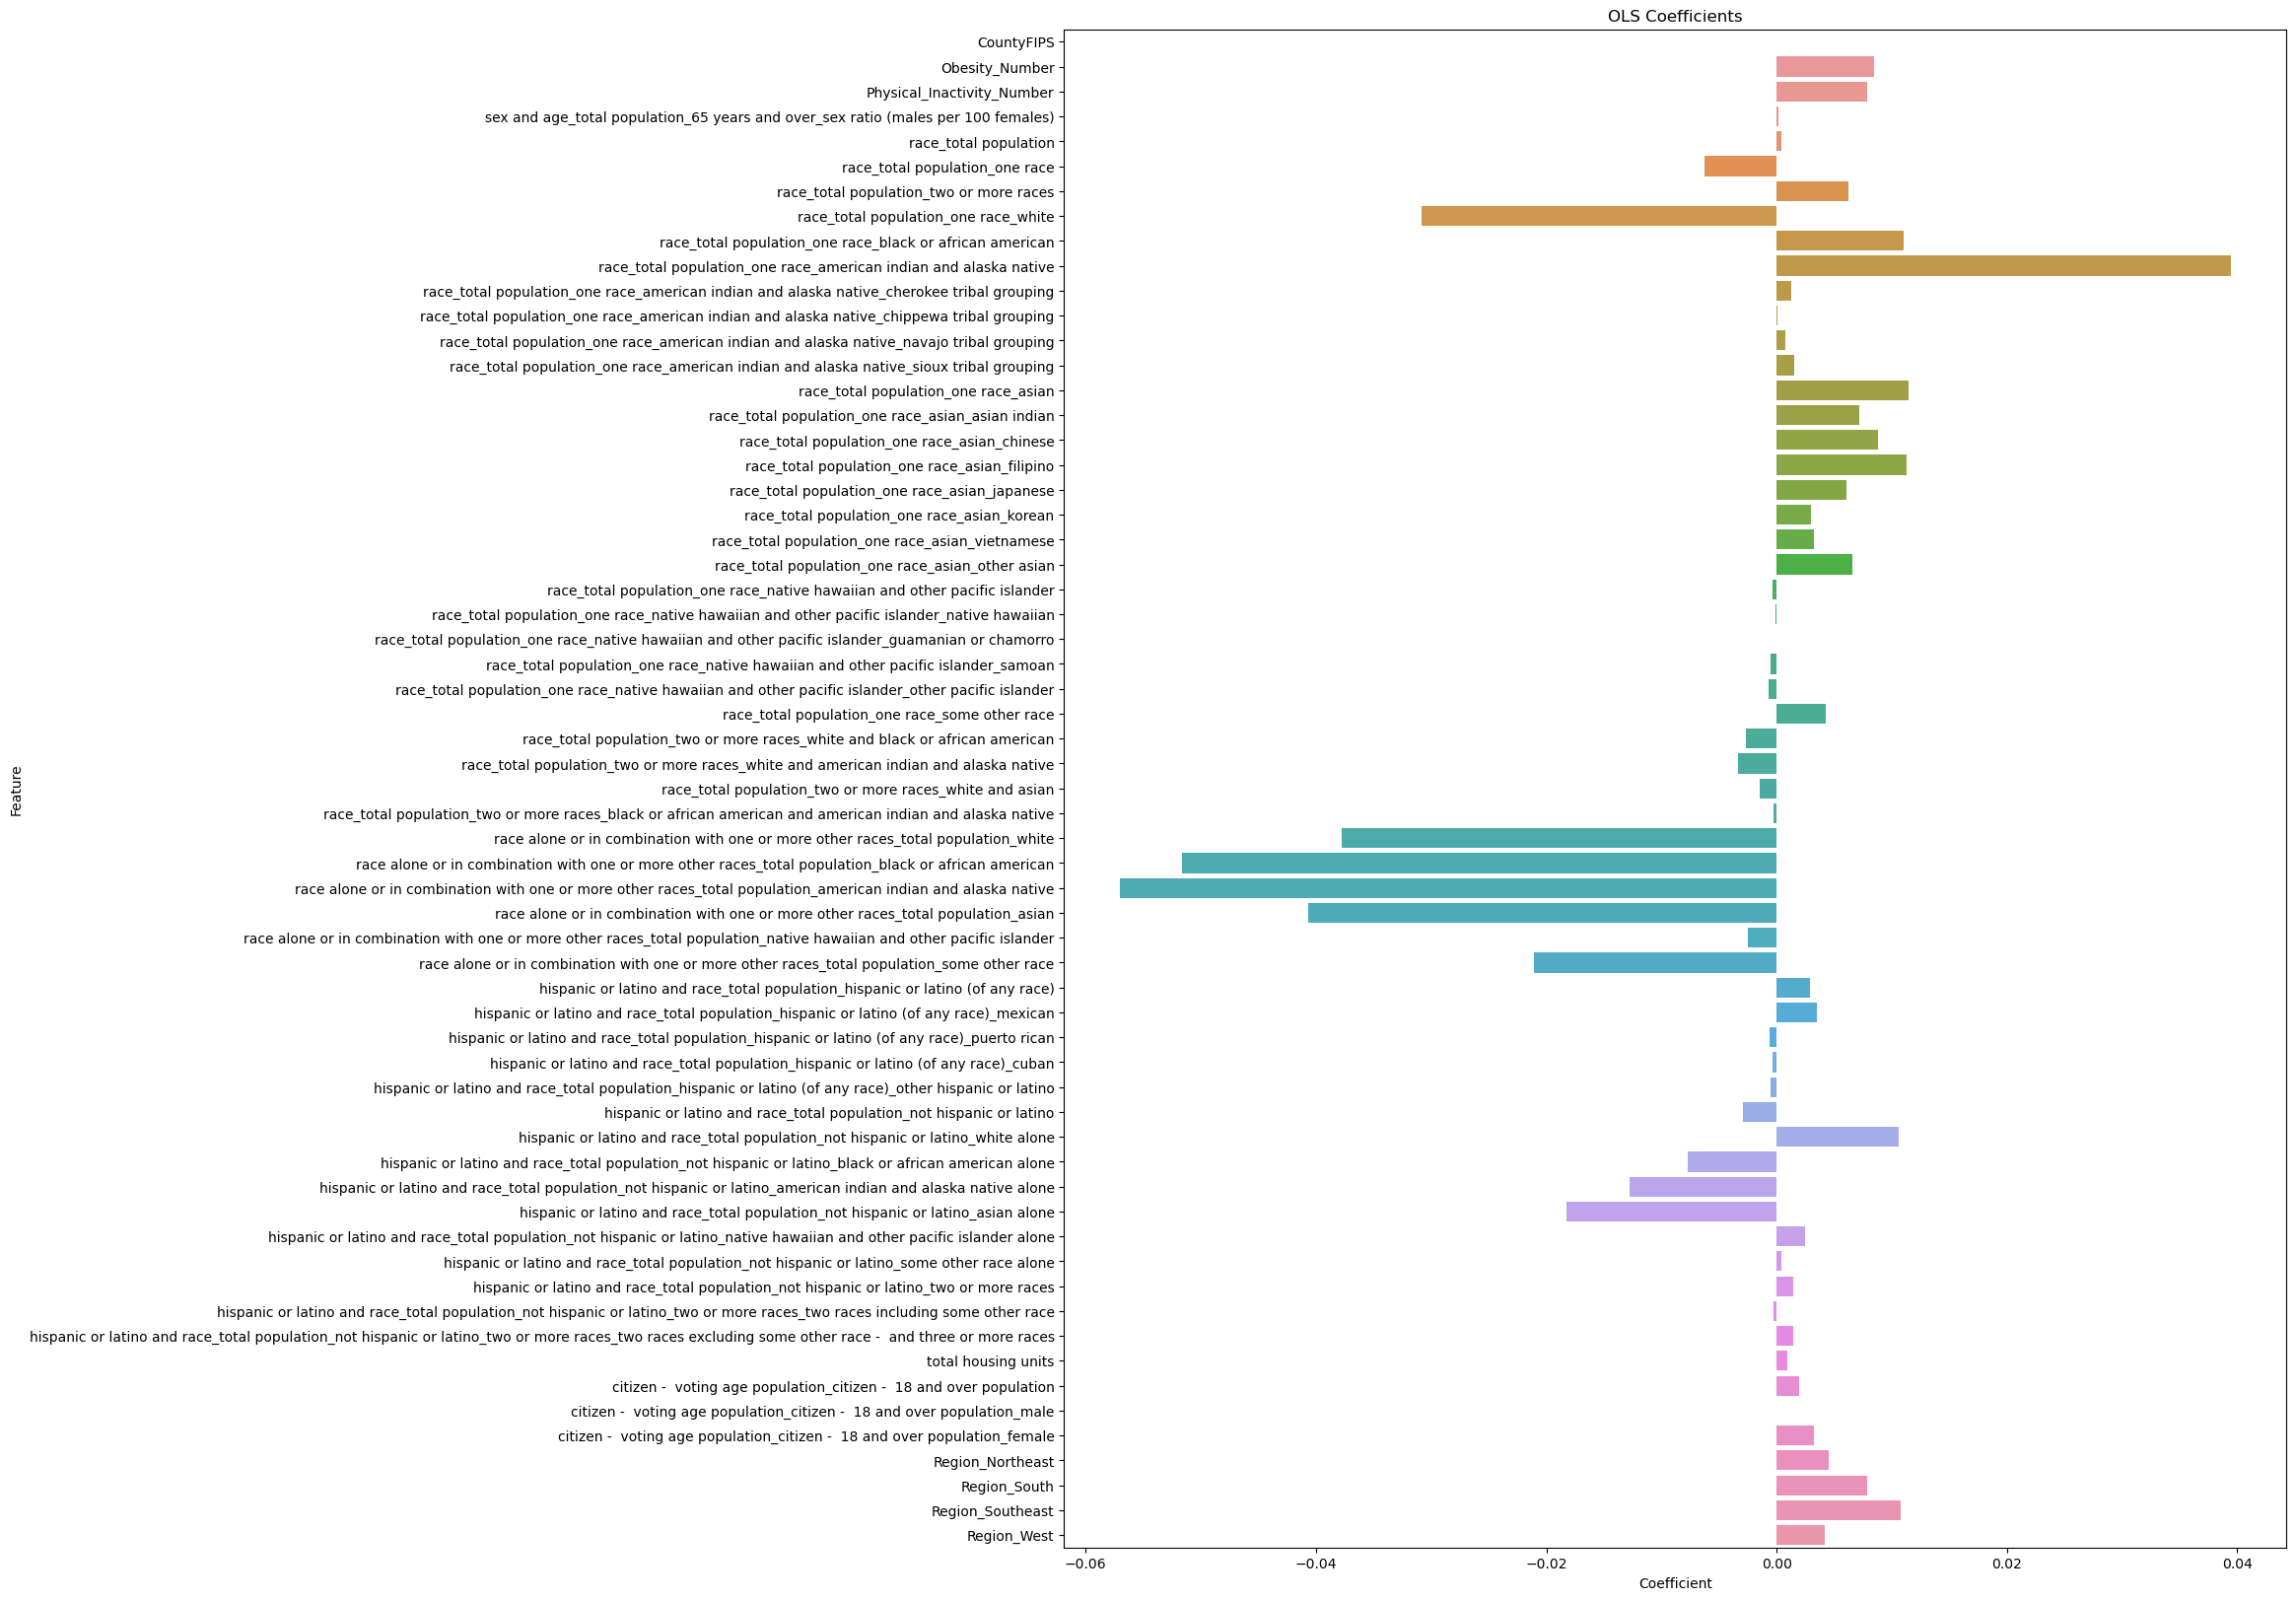

In [41]:
# create a dataframe with the coefficient and feature names for plotting
lin_reg_data = pd.DataFrame([lin_model.coef_, X.columns]).T # make a dataframe from the arrays
lin_reg_data.columns = ['Coefficient', 'Feature']           # add column names for clarity

# plot
plt.figure(figsize=(16, 20))
ax = sns.barplot(x="Coefficient",                           # add x 
                 y="Feature",                               # add y
                 data=lin_reg_data)                         # specify data

ax.set_title("OLS Coefficients")                            # set title
plt.show()                                                  # show plot

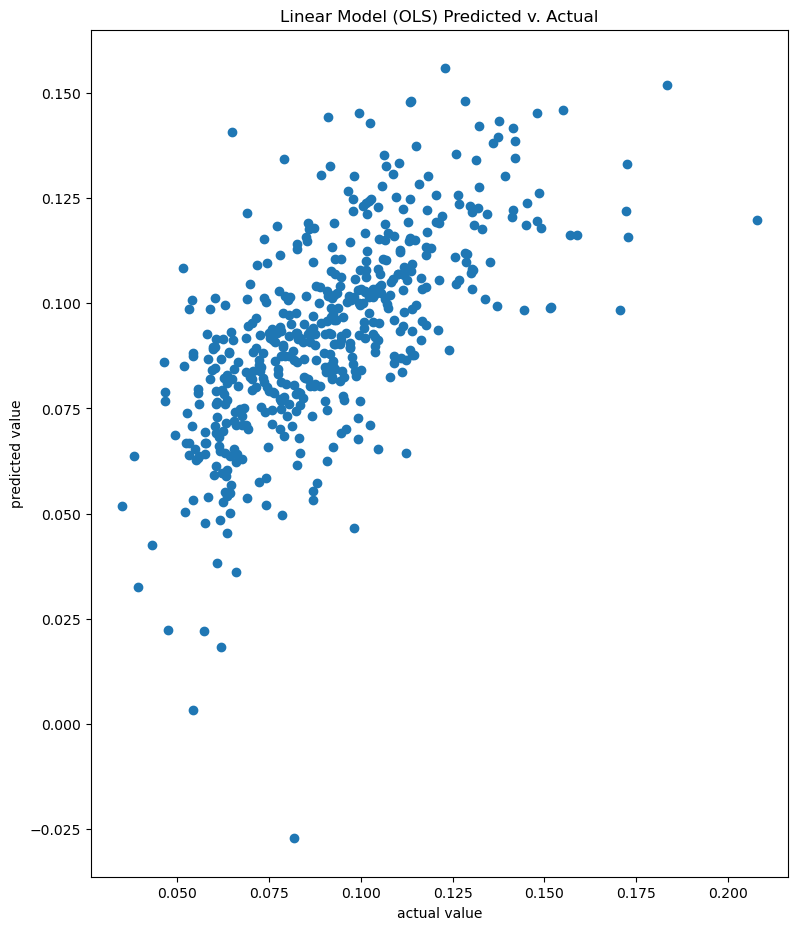

In [42]:
# using the validation dataset and the trained model, predict the number of those with diabetes 
lin_pred = lin_model.predict(X_validate)

# plot the residuals on a scatter plot
plt.figure(figsize=(9, 11))  # Adjust the figsize to stretch the plot (width, height)
plt.scatter(y_validate, lin_pred)                    # specify x and y of the scatter plot
plt.title('Linear Model (OLS) Predicted v. Actual')  # specify plot title
plt.xlabel('actual value')                           # specify x-axis label
plt.ylabel('predicted value')                        # specify y-axis label
plt.show()                                           # show plot

In [43]:
# create function to calculate the root mean squared errror
def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

In [44]:
# calculate root mean squared errror
rmse(lin_pred,     # specify predicted values 
     y_validate)   # specify actual values values 

0.020752624926396887

In [45]:
# import library 
from sklearn.metrics import mean_squared_error

# print out root mean squared error result
print(mean_squared_error(lin_pred,
                         y_validate, 
                         squared = False)) # set squared parameter to false to get root, otherwise mean square error

0.020752624926396887


#### Model 2:  (Ridge) 

In [46]:
#
# Model 2 training
#-----------


In [47]:
from sklearn.linear_model import Ridge

In [52]:
# make and fit a Ridge regression model
ridge_reg = Ridge()                                              # create the model
ridge_model = ridge_reg.fit(X_train, y_train)                    # fit the model

# create a dataframe with the coefficient and feature names for plotting
ridge_reg_data = pd.DataFrame([ridge_model.coef_, X.columns]).T  # create a dataframe from the estimates
ridge_reg_data.columns = ['Coefficient', 'Feature']              # add column names for clarity

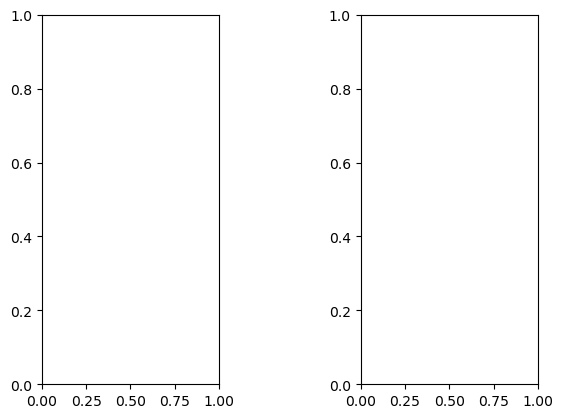

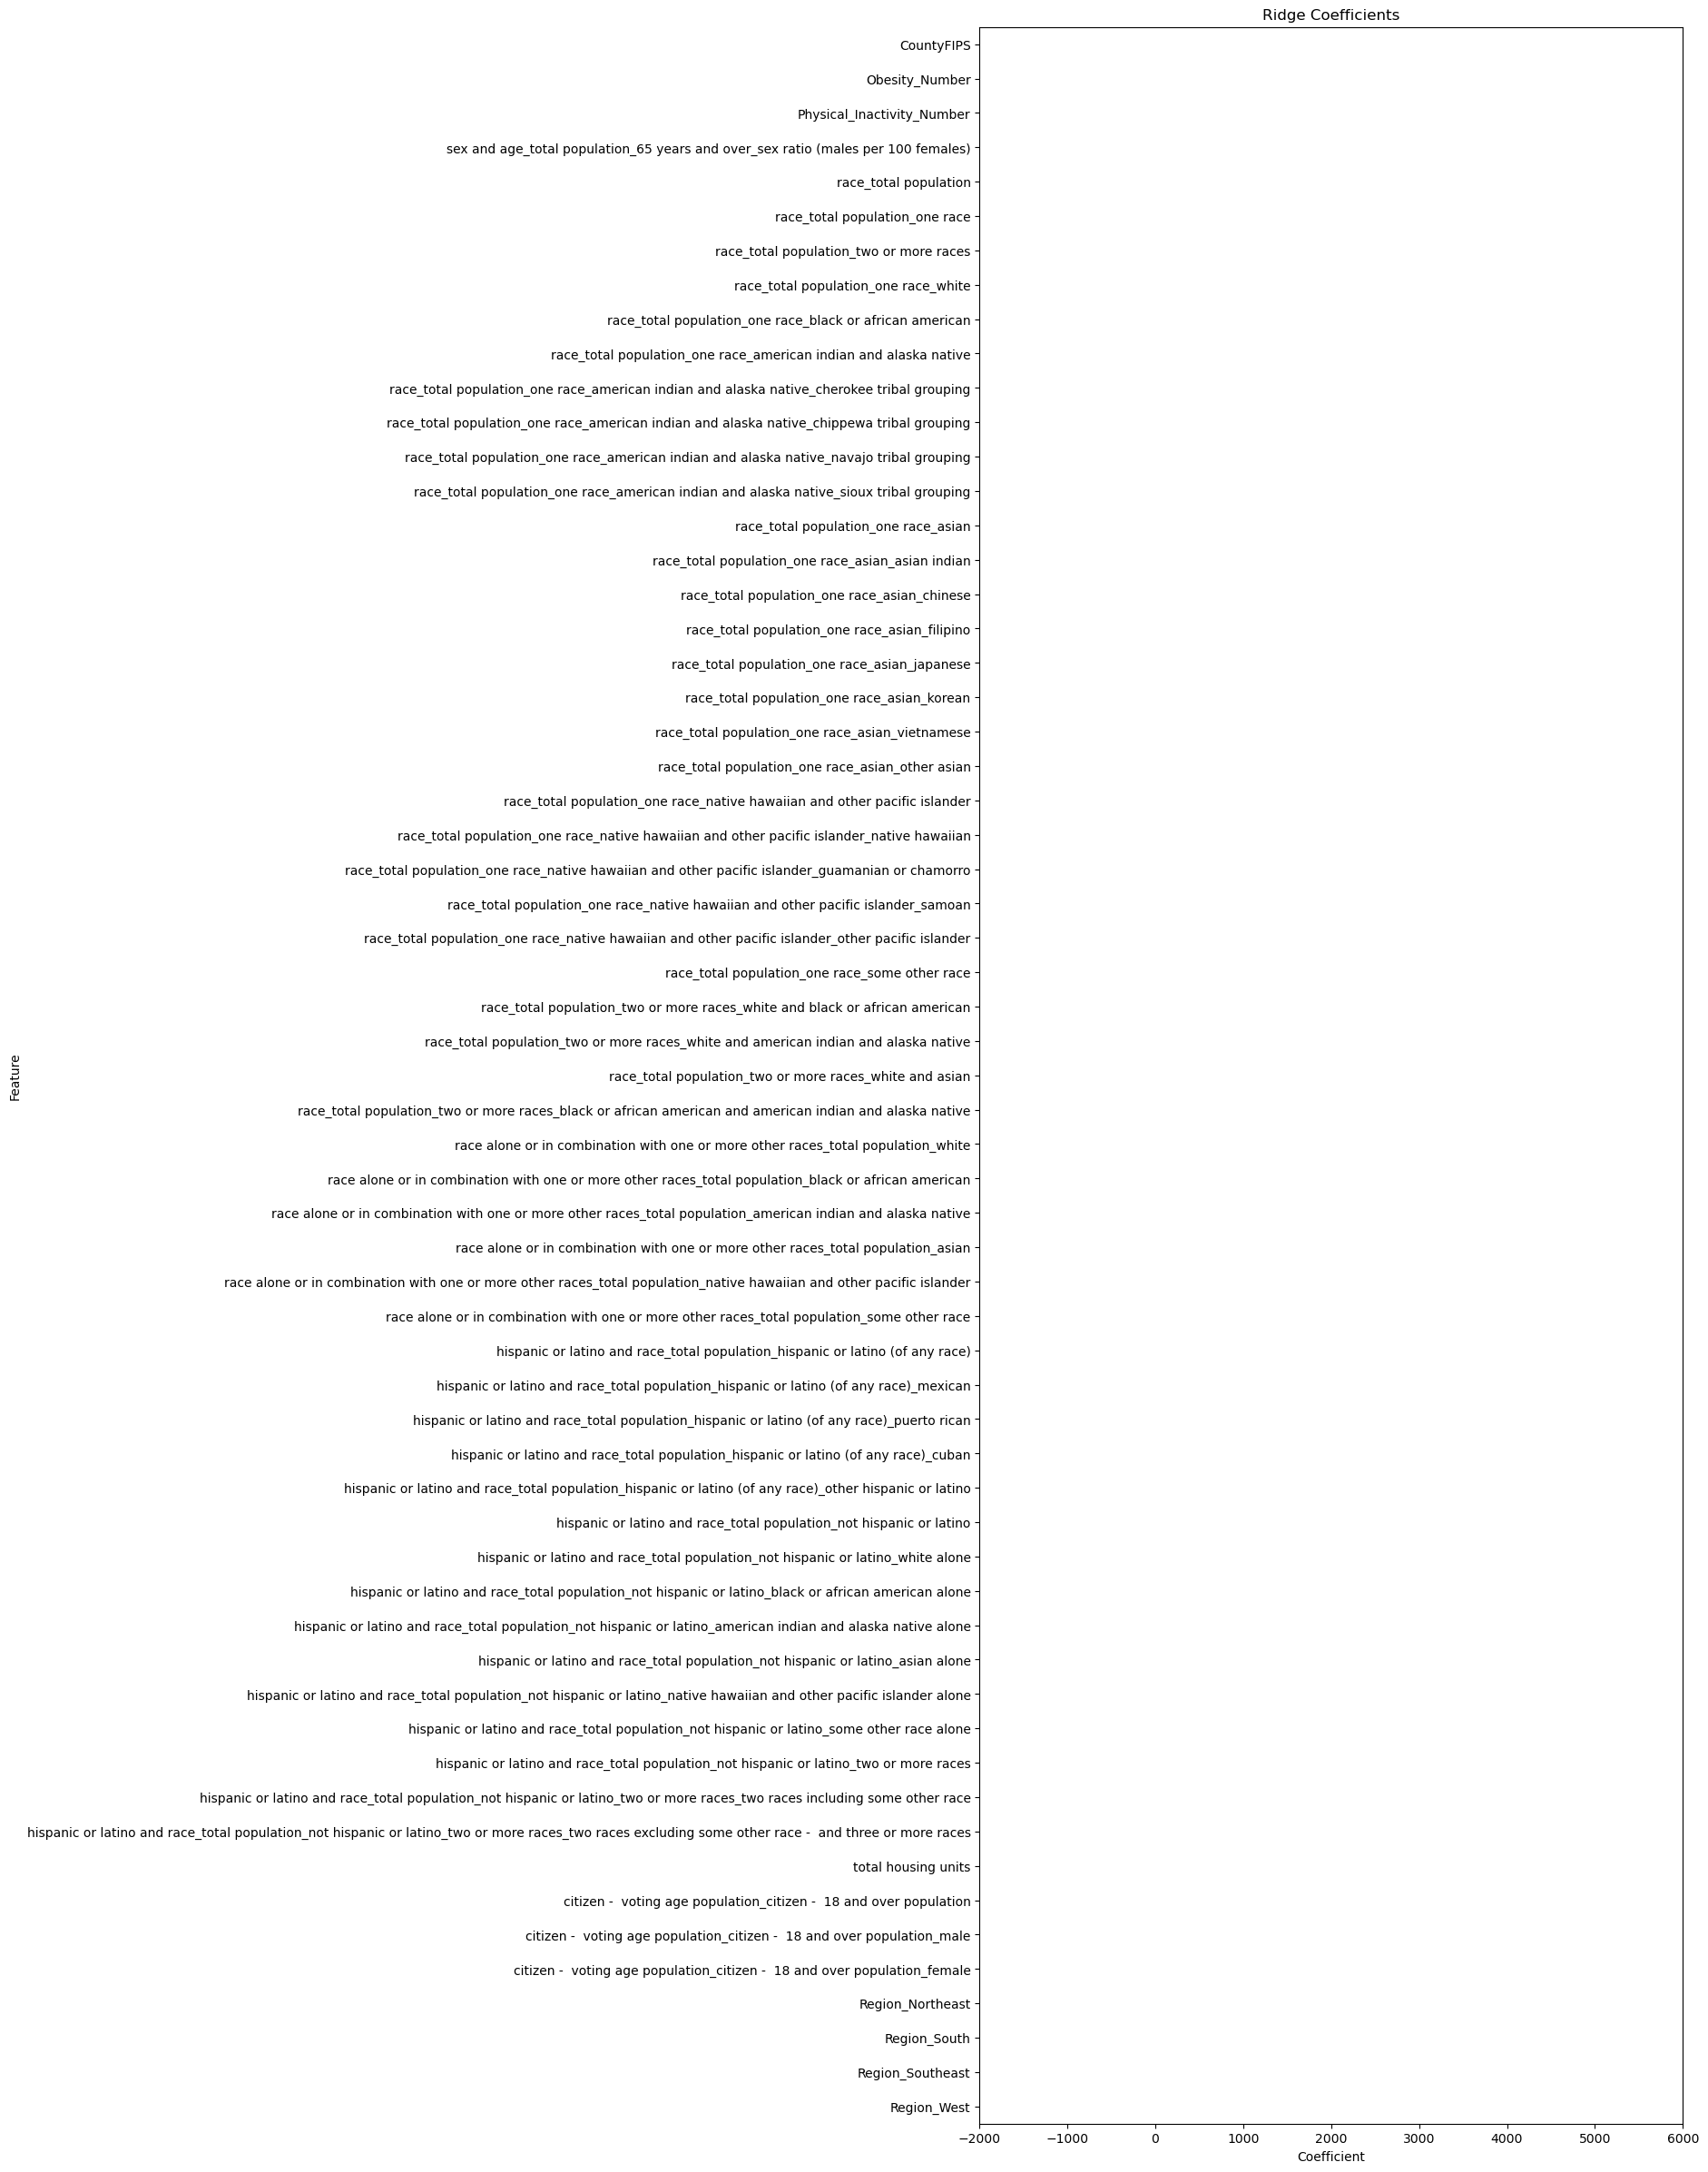

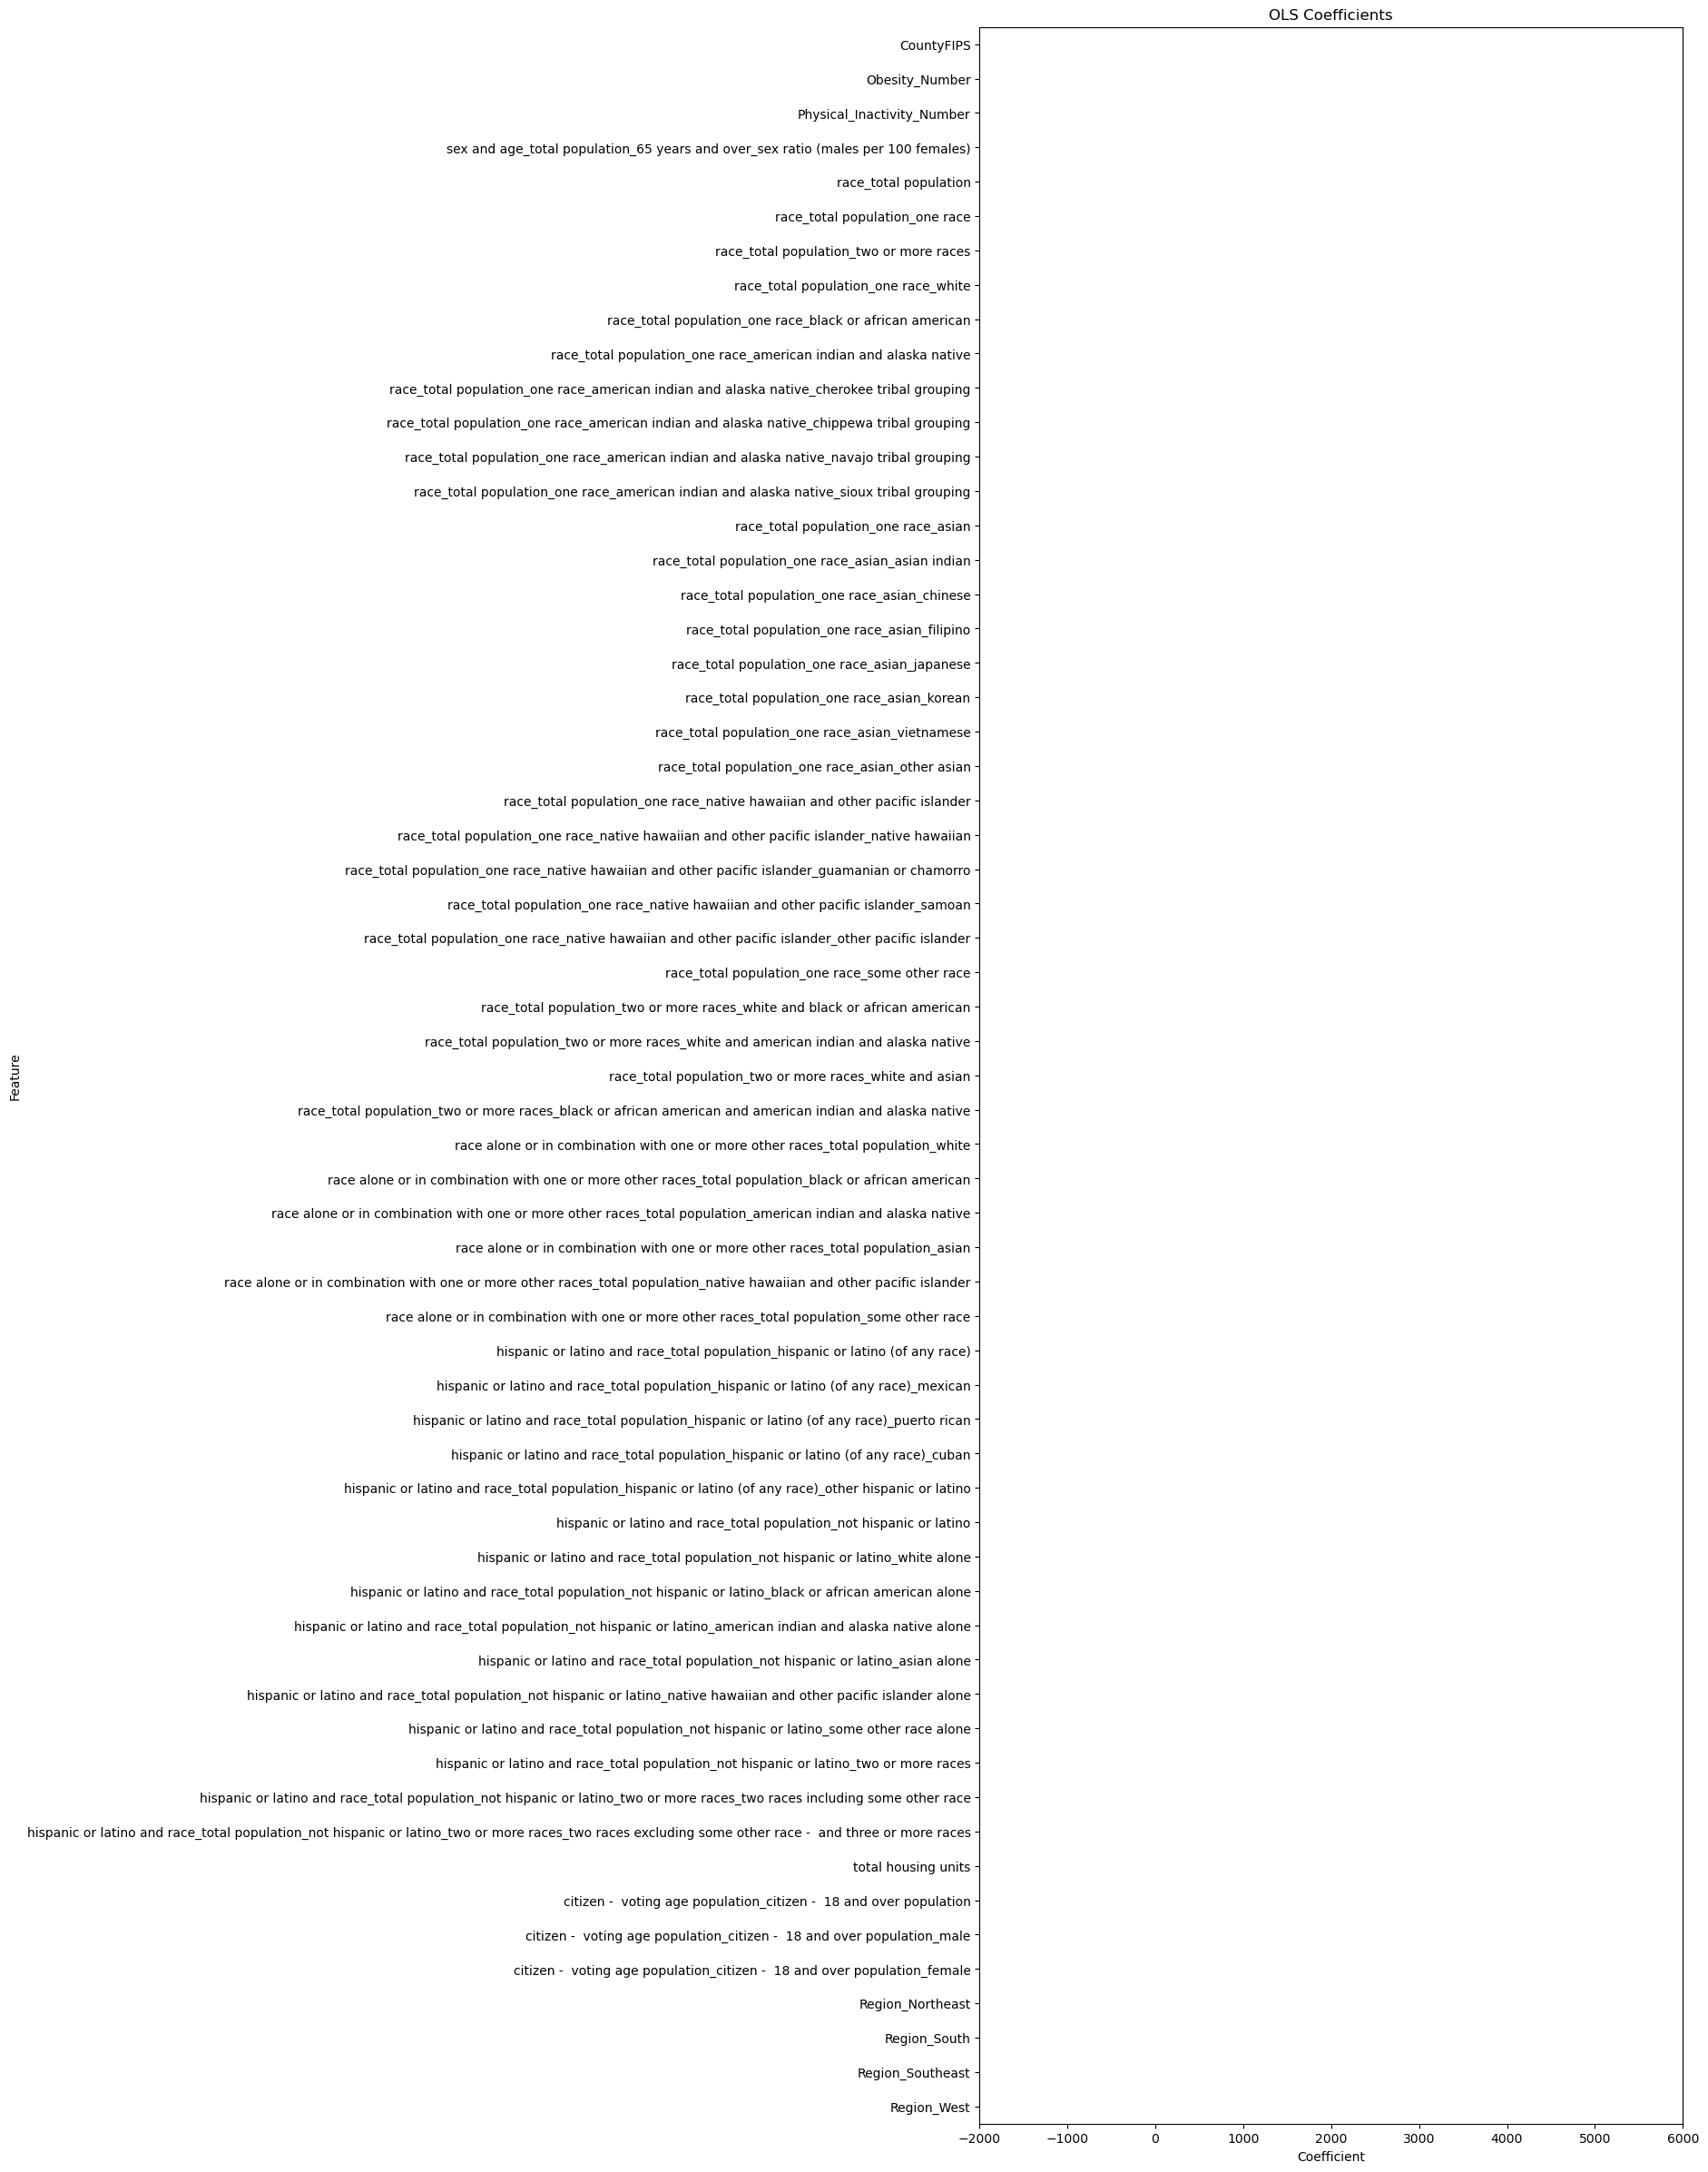

In [83]:
# set the figure parameters
figure = plt.figure()                            # set the figure space
figure.subplots_adjust(wspace = .8, hspace=.5)   # adjust the space in between figures 

# plot 1
# ----------
figure.add_subplot(1,   # sets the number of rows
                   2,   # sets columns,
                   1)   # specifies the following code is for the first plot  

# specify barplot for Ridge
plt.figure(figsize=(10, 30))
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=ridge_reg_data).set_title("Ridge Coefficients")

# ensure the x-axis is the same on both plots
plt.xlim(-2000,6000)


# plot 2
# ----------
figure.add_subplot(1,   # sets the number of rows
                   2,   # sets columns,
                   2)   # specifies the following code is for the second plot 

# specify barplot for OLS
plt.figure(figsize=(10, 30))
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=lin_reg_data).set_title("OLS Coefficients")

# ensure the x-axis is the same on both plots
plt.xlim(-2000,6000)

# show the plots
plt.show()

In [ ]:
# The code above did not yield visually feasible results. THerefore next try below:

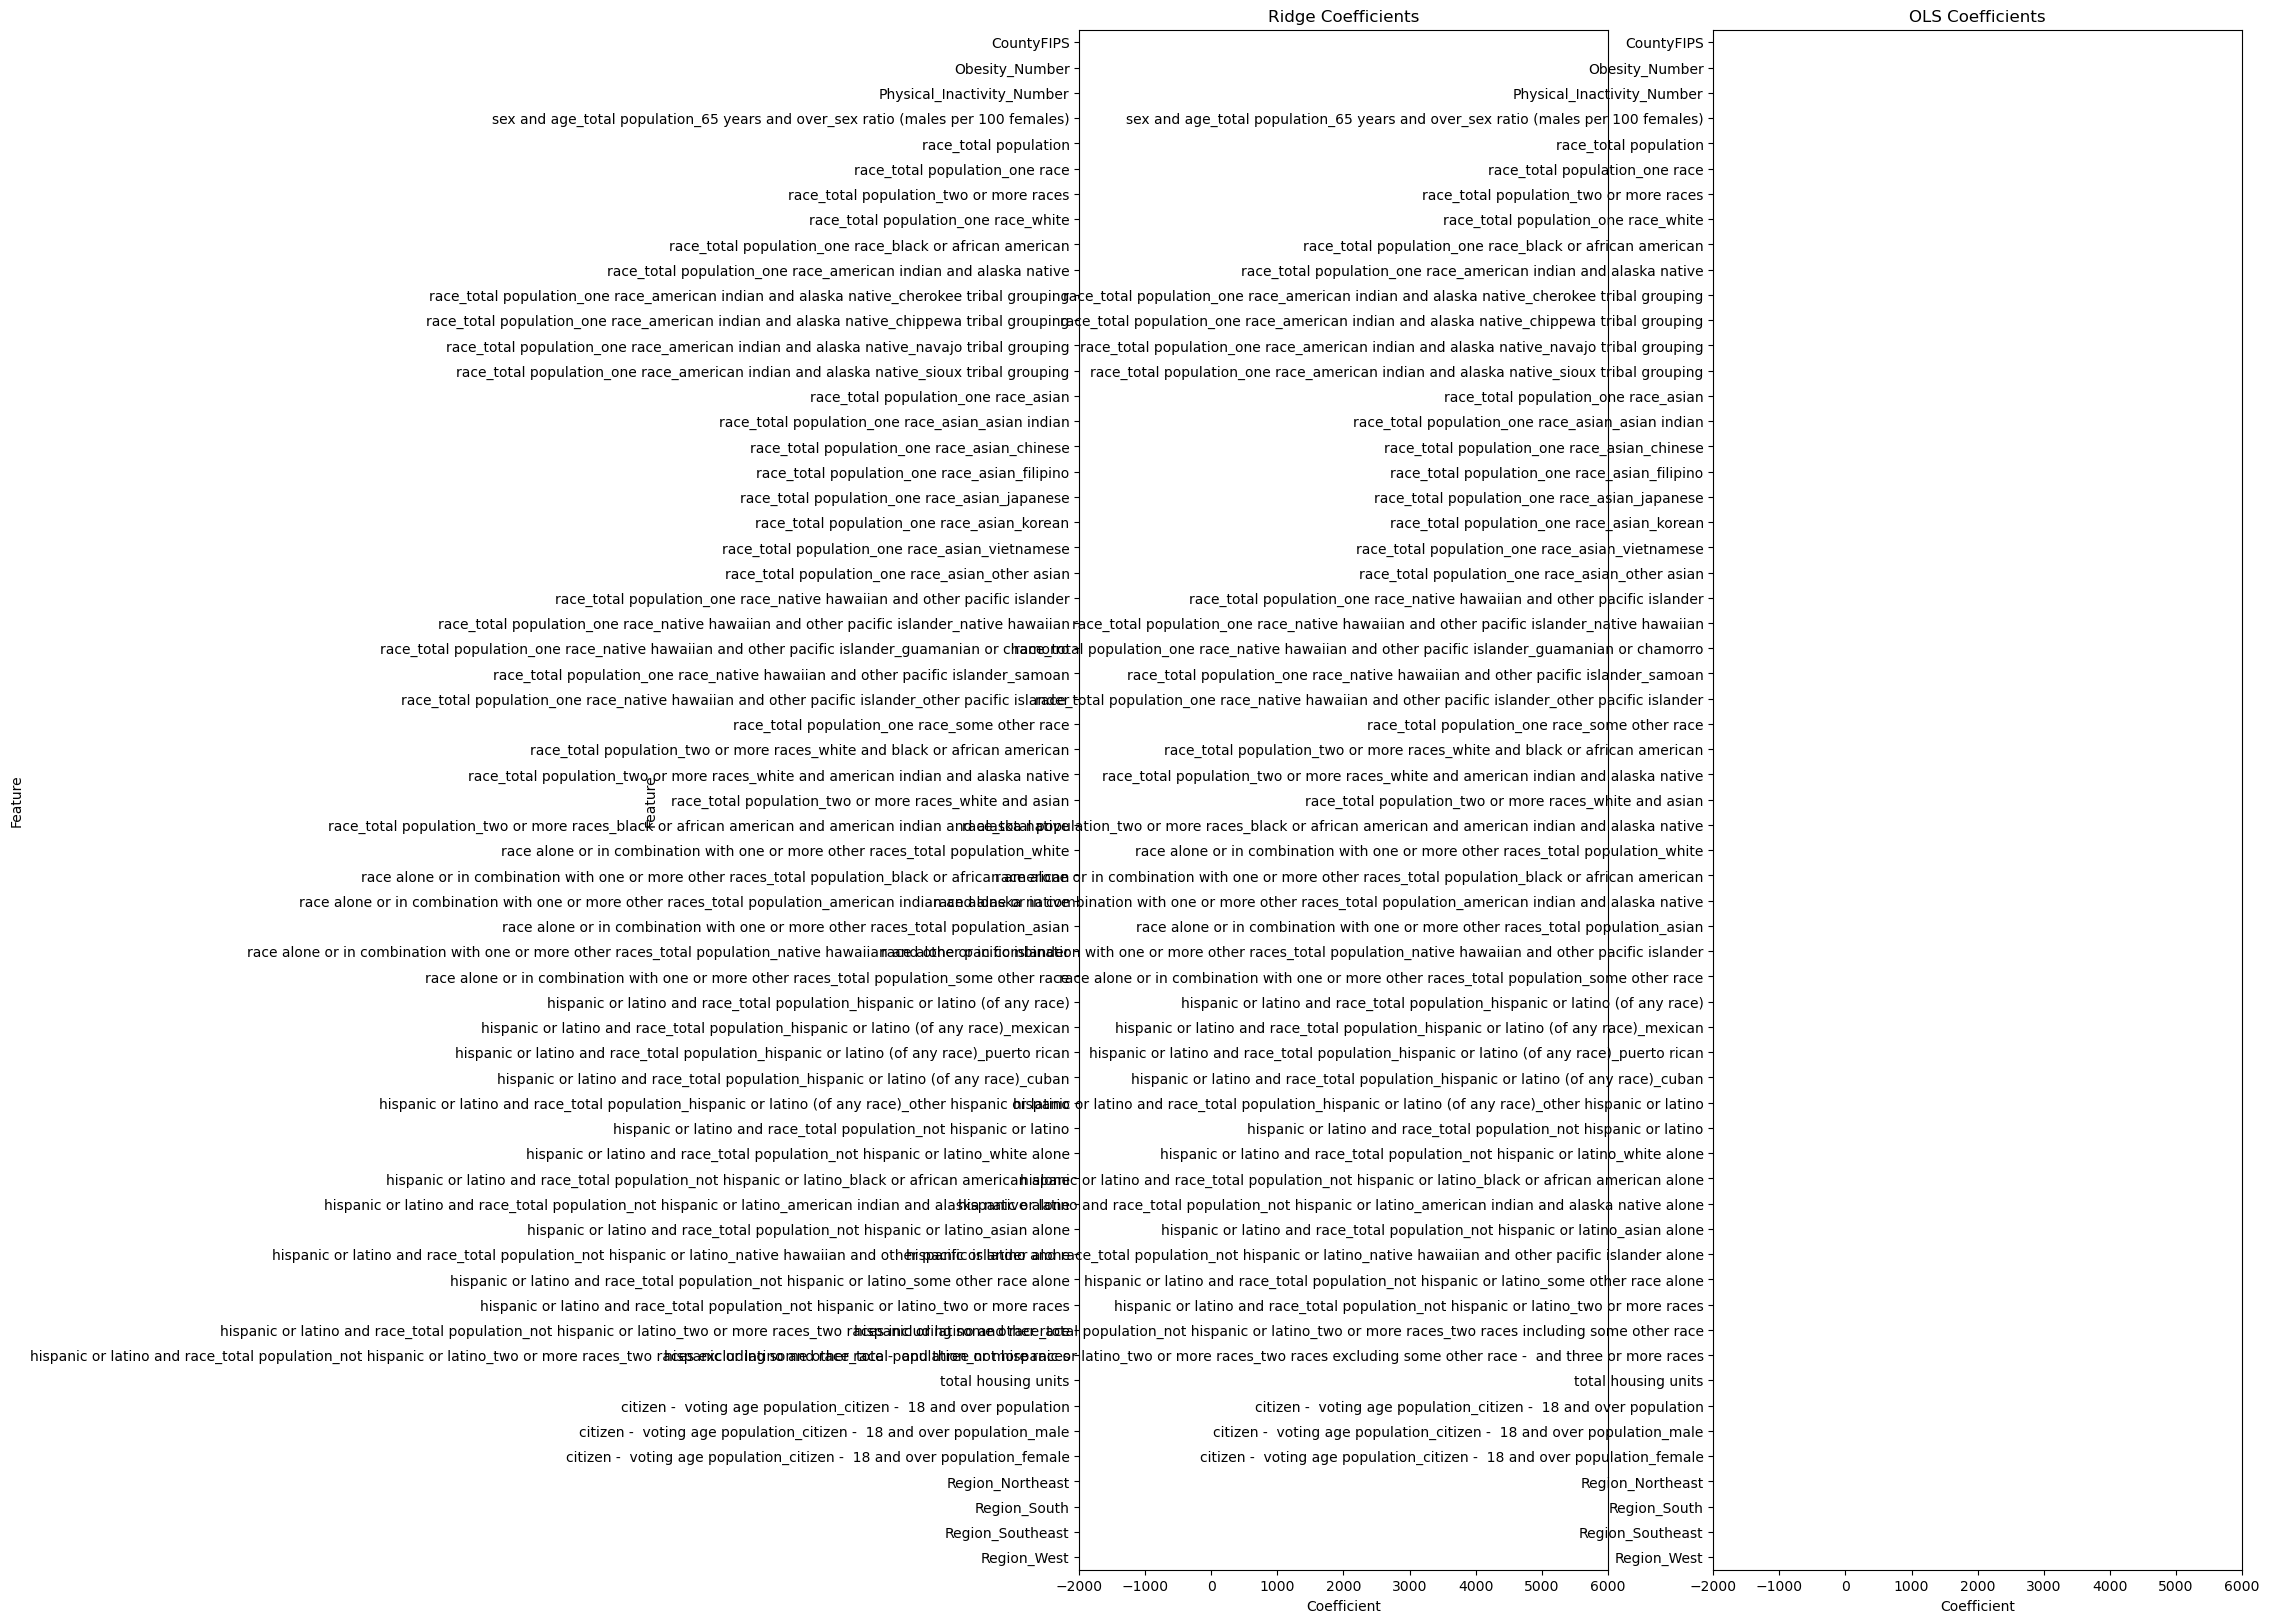

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the figure parameters
figure = plt.figure(figsize=(15, 20))  # Set the figure size

# plot 1
ax1 = figure.add_subplot(1, 2, 1)  # Specify the subplot position
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=ridge_reg_data,
            ax=ax1)  # Assign the subplot to ax1
ax1.set_title("Ridge Coefficients")
ax1.set_xlim(-2000, 6000)  # Set the x-axis limits

# plot 2
ax2 = figure.add_subplot(1, 2, 2)  # Specify the subplot position
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=lin_reg_data,
            ax=ax2)  # Assign the subplot to ax2
ax2.set_title("OLS Coefficients")
ax2.set_xlim(-2000, 6000)  # Set the x-axis limits

# Show the plots
plt.show()


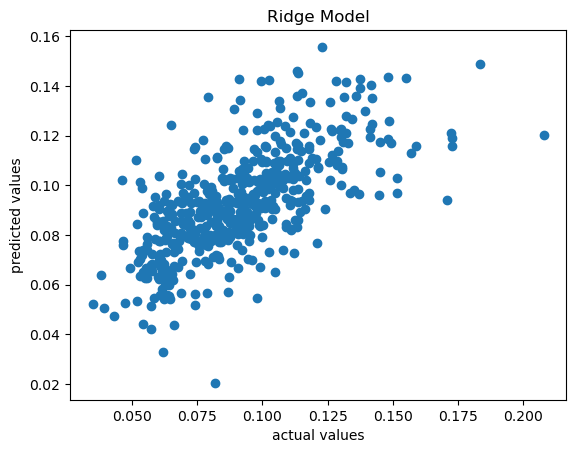

In [54]:
# use the model to make predictions
ridge_pred = ridge_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()


In [55]:
# calculate the rmse for the Ridge model
rmse(ridge_pred, y_validate)

0.019710117984977626

#### Model 3:  (Lasso) 

In [56]:
#
# Model 3 training
#-----------



In [64]:
from sklearn.linear_model import Lasso

# create and fit the model
lasso_reg = Lasso(max_iter=15000)  # note the hypterparameter tuning will not converge with max_iter < 15000
lasso_model = lasso_reg.fit(X_train, 
                            y_train)

# create a dataframe with the coefficient and feature names for plotting
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T  # create a dataframe from the estimates
lasso_reg_data.columns = ['Coefficient', 'Feature']              # add column names for clarity


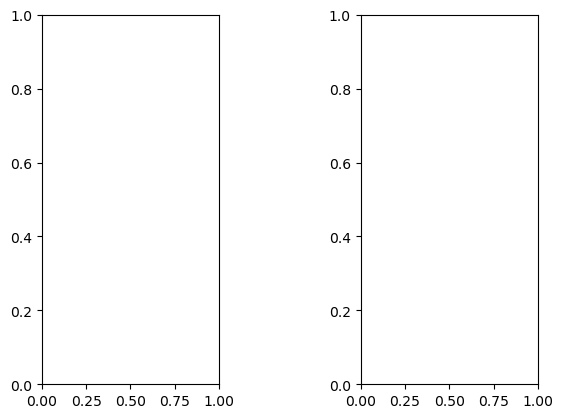

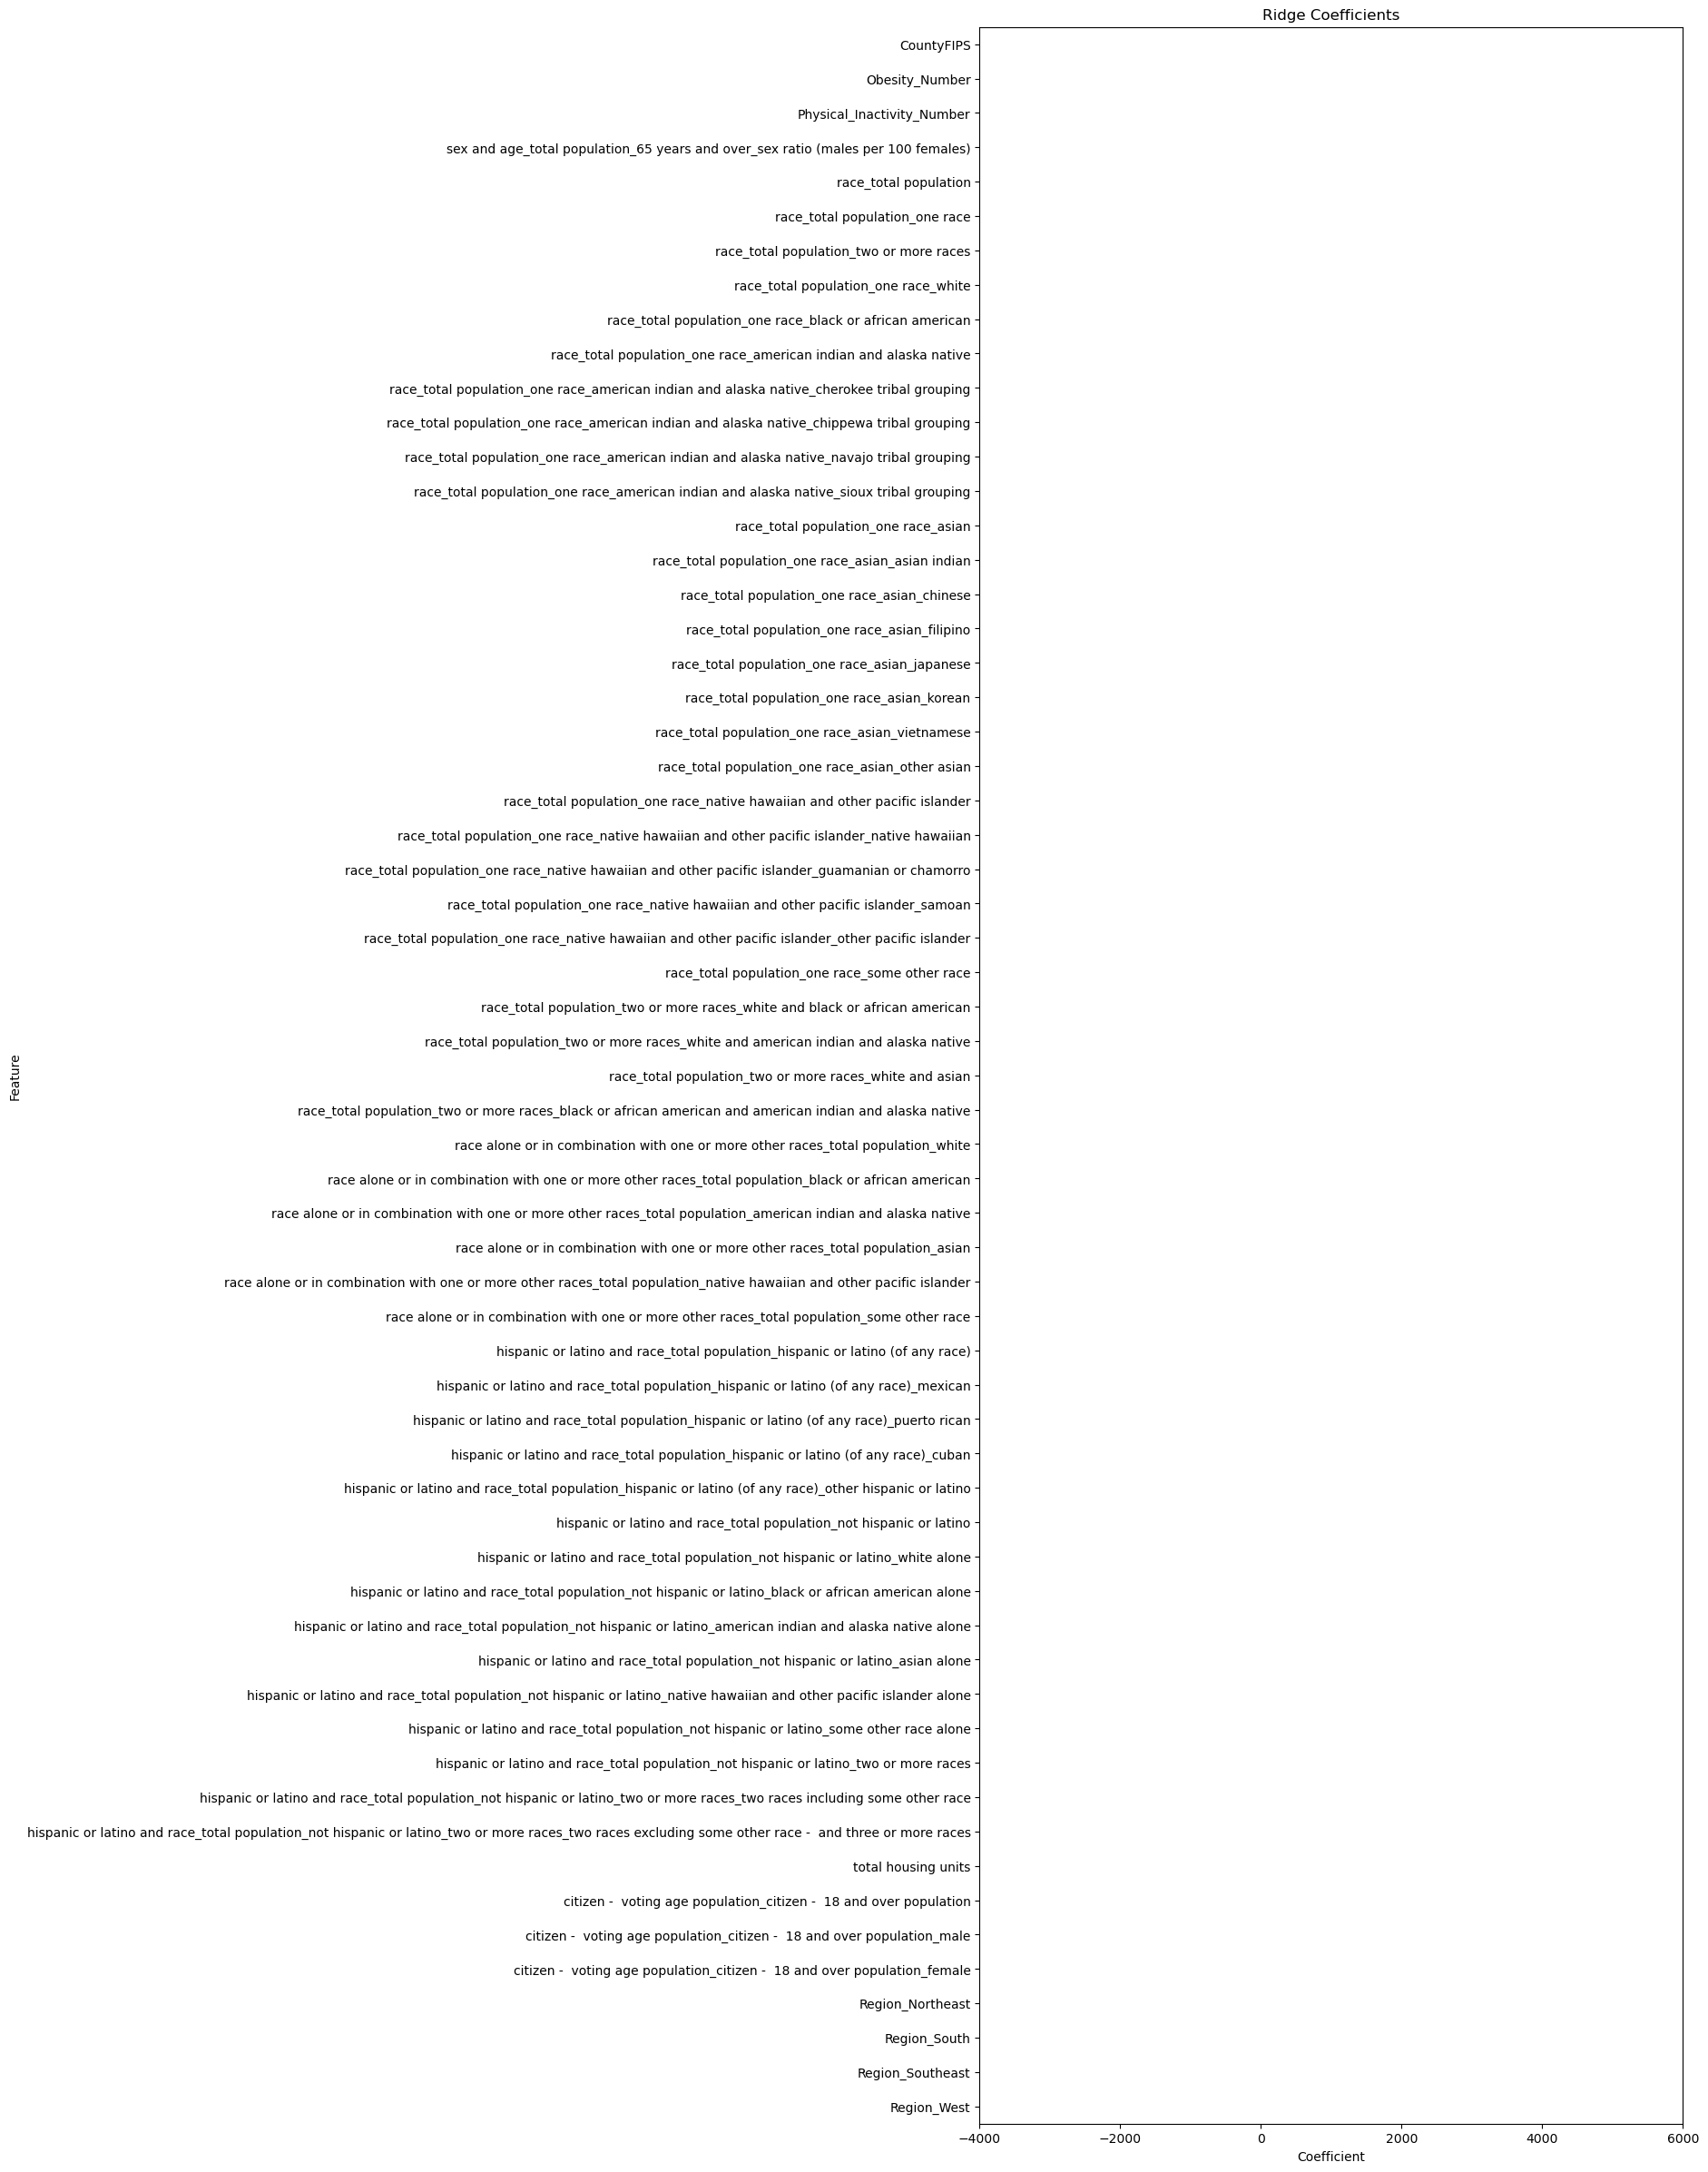

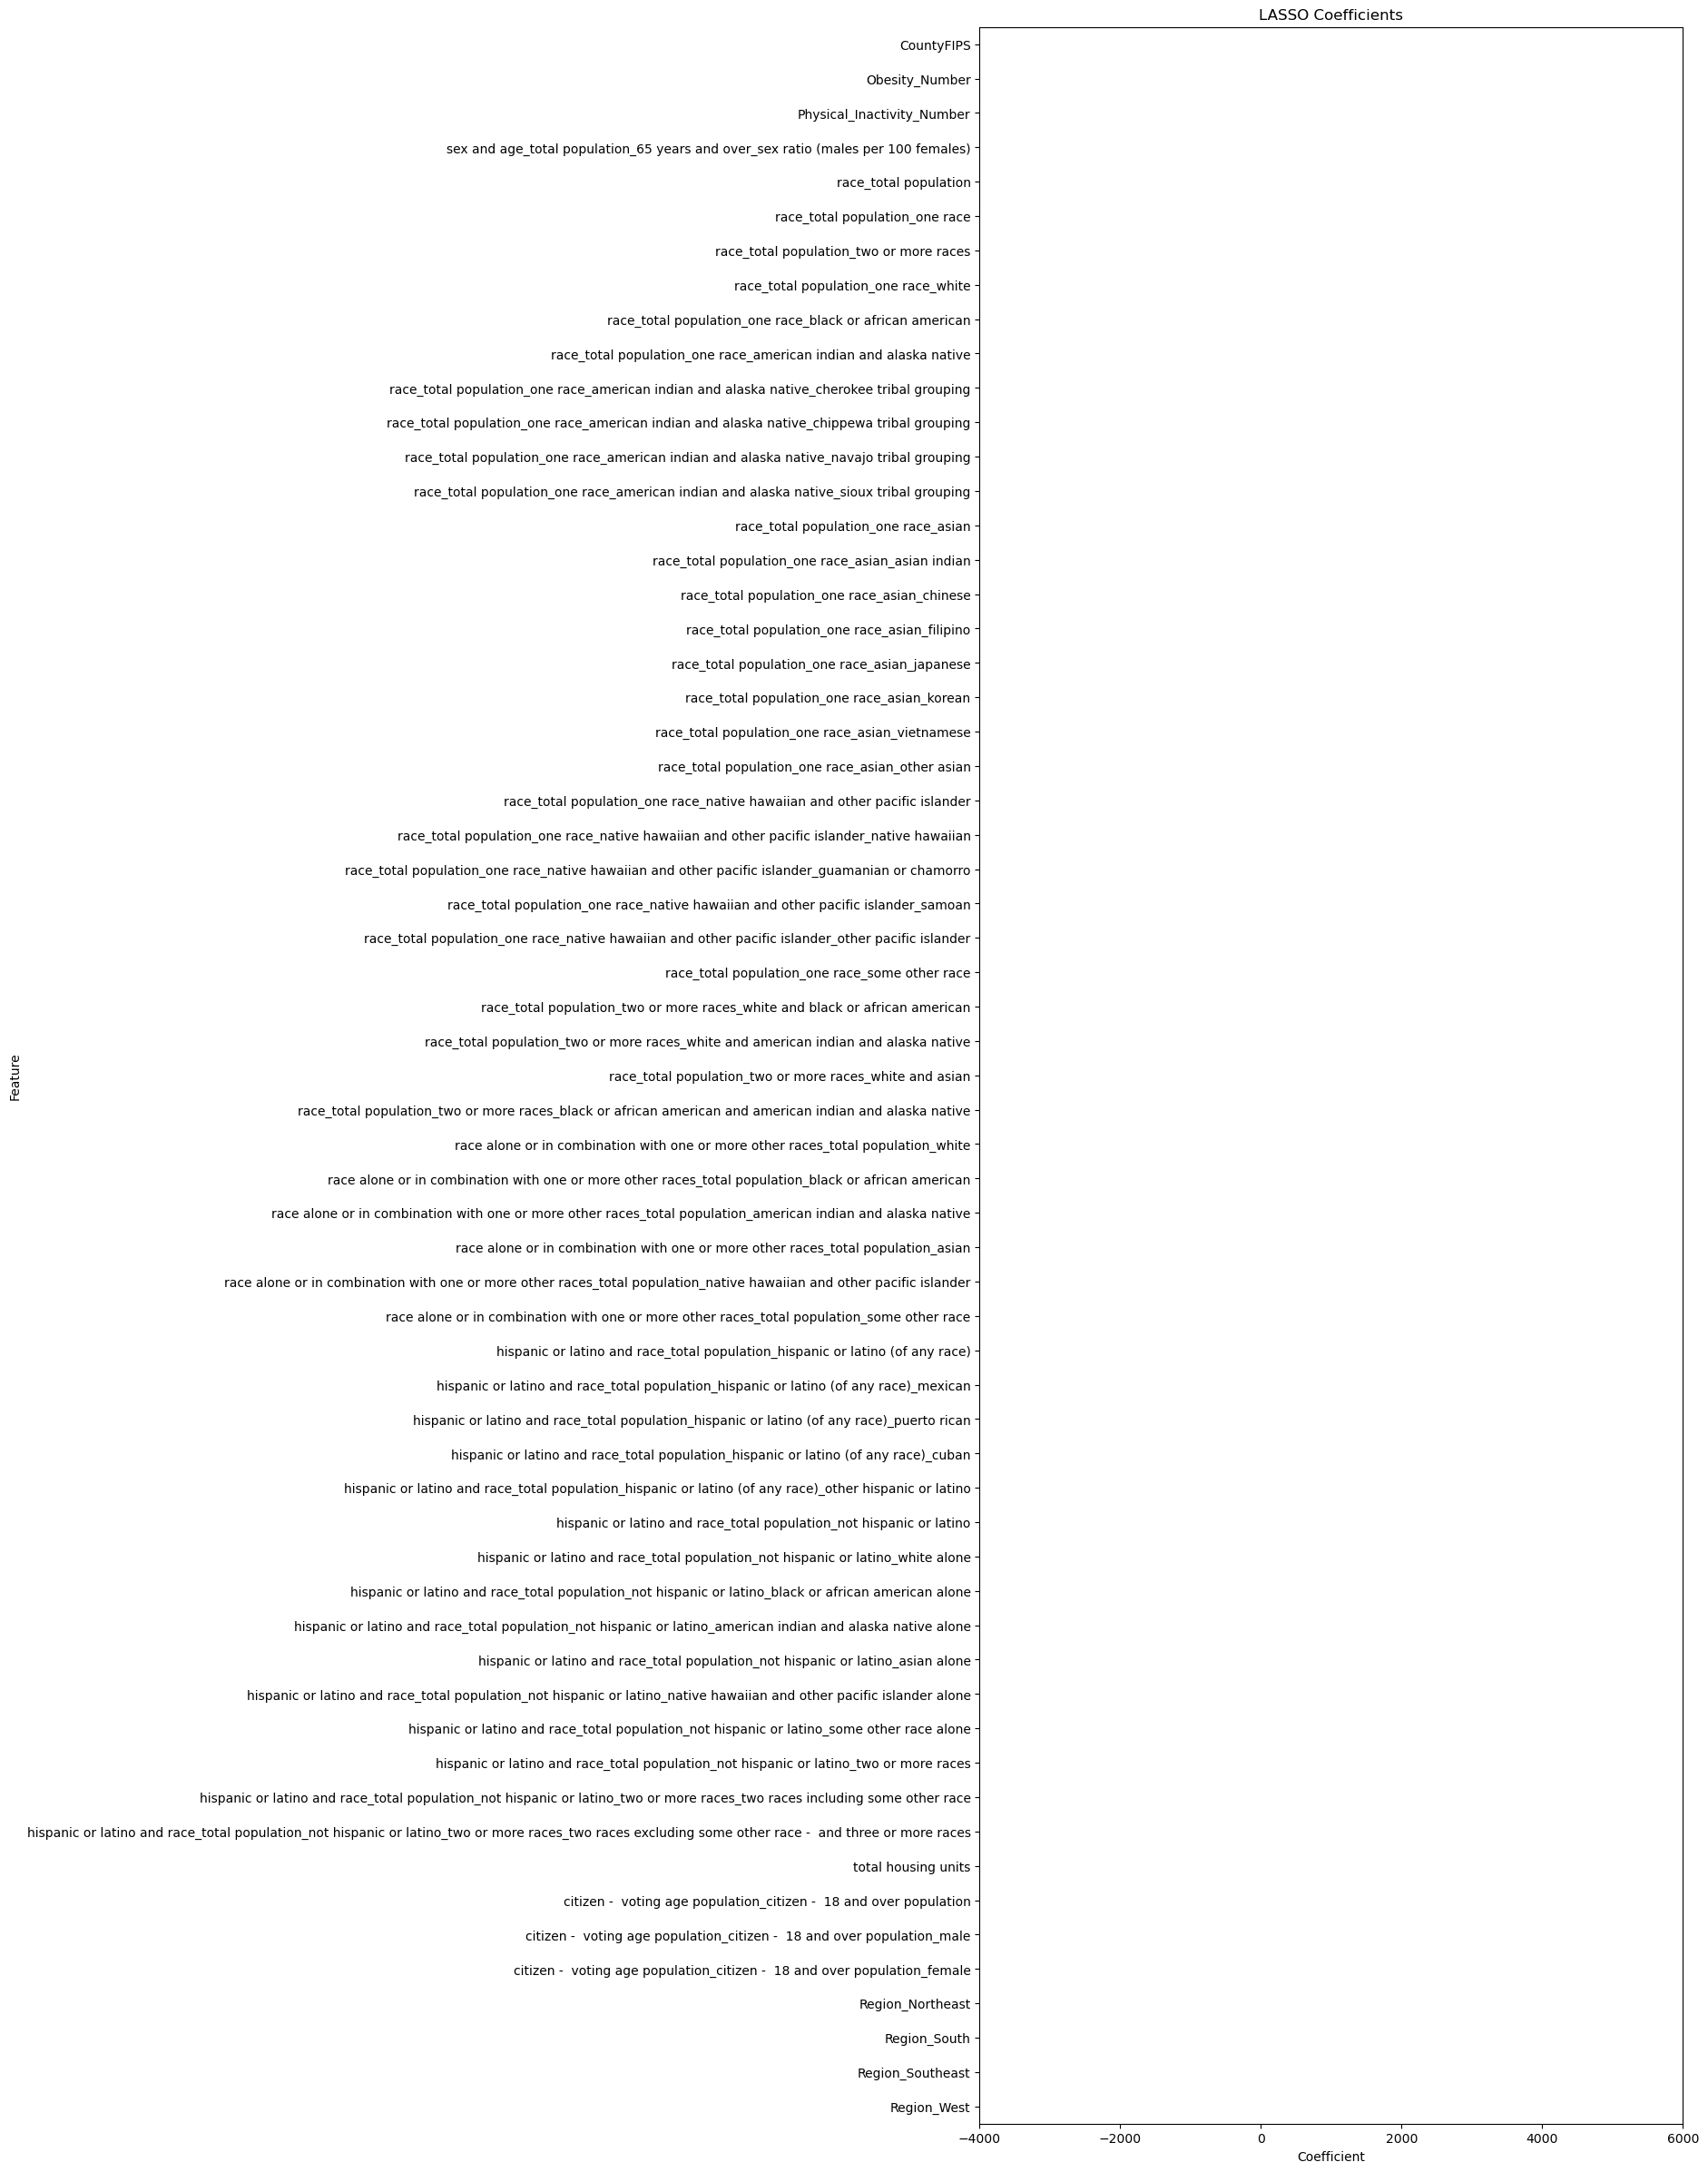

In [80]:
# set the figure 
figure = plt.figure()                            # set the figure space
figure.subplots_adjust(wspace = .8, hspace=.5)   # adjust the space in between figures 

# plot 1
# ----------
figure.add_subplot(1,   # sets the number of rows
                   2,   # sets columns,
                   1)   # specifies the following code is for the first plot  

# specify barplot for Ridge 
plt.figure(figsize=(10, 30))
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=ridge_reg_data).set_title("Ridge Coefficients")


# ensure the x-axis is the same on both plots
plt.xlim(-4000,6000)

# plot 2
# ----------
plt.figure(figsize=(10, 30))
figure.add_subplot(1,   # sets the number of rows
                   2,   # sets columns,
                   2)   # specifies the following code is for the second plot 

# specify barplot for LASSO 
sns.barplot(x="Coefficient", 
            y="Feature", 
            data=lasso_reg_data).set_title("LASSO Coefficients")


# ensure the x-axis is the same on both plots
plt.xlim(-4000,6000)

# show the plot
plt.show()

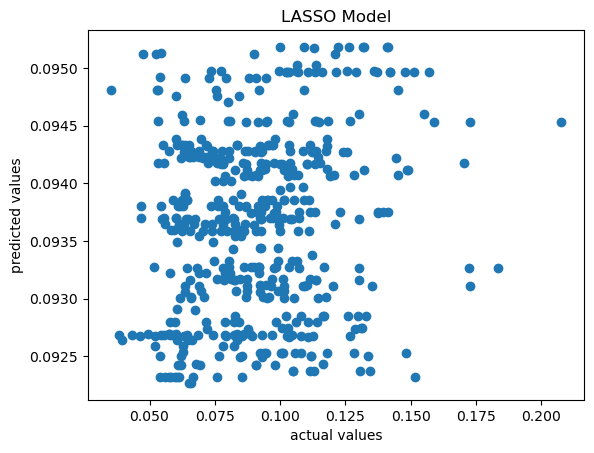

In [81]:
# use the model to make predictions
lasso_pred = lasso_model.predict(X_validate)

# plot the predictions
plt.scatter(y_validate, lasso_pred)

# add title and labels
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

In [67]:
# calculate the rmse for the LASSO model
rmse(lasso_pred, y_validate)

0.02589336569686868

In [68]:
# Hyperparameter testing

In [69]:
# see parameters for linear regression
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [70]:
# see parameters for Ridge regression
ridge_reg.get_params()

{'alpha': 0.3,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [71]:
# see parameters for Lasso regression
lasso_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 15000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [72]:
#
# Linear regression 
#-----------

from sklearn.model_selection import GridSearchCV

# specify the hyperparameters
param_grid = {'fit_intercept': [True, False]}          # use dictionary for tuning

# execute the grid search
lin_grid_reg = GridSearchCV(estimator  = lin_reg,      # model to be tuned
                            param_grid = param_grid,   # parameters to be searched as specified above
                            cv=3)                      # 3-fold cross-validation to be used during hypertuning

# now fit the tuning on the training data
lin_grid_reg.fit(X_train, y_train)

# select the best performing model and predict with that on validation dataset
best_index = np.argmax(lin_grid_reg.cv_results_["mean_test_score"])  # find the best performing model
best_lin_pred = lin_grid_reg.best_estimator_.predict(X_validate)     # find best estimator and predict on validate

# print the results  
print(lin_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lin_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lin_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lin_pred, y_validate))

{'fit_intercept': True}
Best CV R^2: 0.4490135739102183
Validation R^2: 0.3578765223659839
Validation RMSE 0.020752624926396887


In [73]:
#
# RIDGE 
#-----------
# We will run 9*2*4 = 72 tests, each with 3-fold cross validation

# specify the hyperparameters
param_grid = {'alpha': np.arange(.1, 1, .1),
              'fit_intercept': [True, False],
              'solver': ['auto', 'svd', 'cholesky', 'lsqr']}

# execute the grid search
ridge_grid_reg = GridSearchCV(ridge_reg,  # model to be tuned
                              param_grid, # parameters to be searched as specified above
                              cv=3)       # 3-fold cross-validation to be used during hypertuning

# fit the tuning on the training data
ridge_grid_reg.fit(X_train, y_train)

# select the best performing model and predict with that on validation dataset 
best_index = np.argmax(ridge_grid_reg.cv_results_["mean_test_score"])  # find the best performing model
best_ridge_pred = ridge_grid_reg.best_estimator_.predict(X_validate)   # find best estimator and predict on validate

# print the results  
print(ridge_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(ridge_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', ridge_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_ridge_pred, y_validate))

{'alpha': 0.9, 'fit_intercept': True, 'solver': 'auto'}
Best CV R^2: 0.454511999190033
Validation R^2: 0.4193685898023549
Validation RMSE 0.019733950084405334


In [74]:
# example of how to do this by hand
from sklearn.model_selection import cross_val_score

# set specification 1
ridge_reg = Ridge(alpha=.1)
print(np.mean(cross_val_score(ridge_reg, X_train, y_train, cv = 3)))

# set specification 2
ridge_reg = Ridge(alpha=.2)
print(np.mean(cross_val_score(ridge_reg, X_train, y_train, cv = 3)))

# set specification 3
ridge_reg = Ridge(alpha=.3)
print(np.mean(cross_val_score(ridge_reg, X_train, y_train, cv = 3)))

0.4507402455327034
0.4516630423076551
0.4523198688741144


In [75]:
ridge_grid_reg.cv_results_["mean_test_score"]


array([ 0.45074025,  0.45074025,  0.45074025,  0.10834521, -4.20963826,
       -4.20963826, -4.20963826, -2.22206003,  0.45166304,  0.45166304,
        0.45166304,  0.10834502, -4.15254495, -4.15254495, -4.15254495,
       -2.22206003,  0.45231987,  0.45231987,  0.45231987,  0.10834484,
       -4.09666755, -4.09666755, -4.09666755, -2.22206003,  0.45283039,
        0.45283039,  0.45283039,  0.10834465, -4.0430244 , -4.0430244 ,
       -4.0430244 , -2.22206003,  0.45325178,  0.45325178,  0.45325178,
        0.10834447, -3.99141594, -3.99141594, -3.99141594, -2.22206003,
        0.45361535,  0.45361535,  0.45361535,  0.10834428, -3.94158627,
       -3.94158627, -3.94158627, -2.22206003,  0.45393959,  0.45393959,
        0.45393959,  0.1083441 , -3.89333258, -3.89333258, -3.89333258,
       -2.22206003,  0.454236  ,  0.454236  ,  0.454236  ,  0.10834391,
       -3.84650207, -3.84650207, -3.84650207, -2.22206003,  0.454512  ,
        0.454512  ,  0.454512  ,  0.10834373, -3.80097809, -3.80

In [76]:
#
# LASSO 
#----------- 

# specify the hyperparameters
param_grid = {'alpha': np.arange(.1, 1, .1),
              'fit_intercept': [True, False],
              'selection': ['cyclic', 'random']}

# execute the grid search
lasso_grid_reg = GridSearchCV(lasso_reg,  # model to be tuned
                              param_grid, # parameters to be searched as specified above
                              cv=3)       # 3-fold cross-validation to be used during hypertuning

# now fit the tuning on the training data
lasso_grid_reg.fit(X_train, y_train)

# select the best performing model and predict with that on validation dataset 
best_index = np.argmax(lasso_grid_reg.cv_results_["mean_test_score"])   # find the best performing model
best_lasso_pred = lasso_grid_reg.best_estimator_.predict(X_validate)    # find best estimator and predict on validate

# print results
print(lasso_grid_reg.cv_results_["params"][best_index])
print('Best CV R^2:', max(lasso_grid_reg.cv_results_["mean_test_score"]))
print('Validation R^2:', lasso_grid_reg.score(X_validate, y_validate))
print('Validation RMSE', rmse(best_lasso_pred, y_validate))

{'alpha': 0.30000000000000004, 'fit_intercept': True, 'selection': 'cyclic'}
Best CV R^2: -0.0030253463884975704
Validation R^2: 0.0007927465941701684
Validation RMSE 0.025887585802979098


## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

In [ ]:
#
# Predict on validation data
#-----------



### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

In [ ]:
#
# Predict using your best model
#-----------



In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create and fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print('R-squared (R^2):', r2)
print('Root Mean Squared Error (RMSE):', rmse)



R-squared (R^2): 0.4049972311753701
Root Mean Squared Error (RMSE): 0.02125960028770586


### 5.3 Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [ ]:
#
# Run cross-validation
#-----------


In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Perform cross-validation with 5-fold CV
scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # You can choose a different scoring metric

# Print the cross-validation scores
print("Cross-Validation R^2 Scores:", scores)
print("Mean R^2:", scores.mean())
print("Standard Deviation of R^2:", scores.std())

Cross-Validation R^2 Scores: [0.36318386 0.29753593 0.44641177 0.38776275 0.43009886]
Mean R^2: 0.38499863462212
Standard Deviation of R^2: 0.05279934386150798


## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

**The bias-variance tradeoff is the balance between bias and variance. It is relevant to ML problems like this one because it helps understand and manage the tradeoff between underfitting (high bias) and overfitting (high variance) when building predictive models.**

**In the context of a machine learning problem like predicting diabetes rates, the bias-variance tradeoff is relevant because: high bias (underfitting) would result in a model that doesn't capture important relationships in the data, leading to inaccurate predictions, and high variance (overfitting) would result in a model that fits the training data too closely, making it sensitive to noise and unable to generalize to new data.**

2. Define overfitting, and why it matters for machine learning. How can we address it?

**Overfitting is when a model captures noise and random fluctuations too highly, disturbing the underlying patterns. An overfit model performs exceptionally well on the training data but performs poorly on the actual data it is applied to in new problems and data. Overfitting occurs when a model becomes overly complex. 
Overfit models have low bias and high variance.**

**Overfitting is problematic for machine learning models. The high variance means that the model is not generalizable to new datasets. The predictions on real-world data is noisy and does not reflect true patterns. Both of these problems defeat the purpose of machine learning models.**

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

**The analysis of the dataset provides valuable insights into the factors influencing diabetes rates across different U.S. counties. Key findings indicate that factors such as obesity, physical inactivity, and race composition are significant predictors of diabetes prevalence. Counties with higher obesity rates tend to have higher diabetes rates, emphasizing the importance of public health initiatives to combat obesity. Similarly, counties with a higher percentage of physically inactive residents exhibit increased diabetes prevalence, underscoring the need for programs promoting physical activity. The race composition of counties plays a particularly high role, with a higher percentage of non-White populations correlating with higher diabetes rates.**

**Based on these findings, recommendations for the pilot program should prioritize counties with a combination of high obesity rates, high physical inactivity rates, and a significant non-White population. Focusing efforts on these counties can have a more substantial impact on reducing diabetes rates. Additionally, taking into account other factors like socioeconomic status, access to healthcare, and dietary habits could further refine the selection of target counties.**

**While the model provides valuable insights, it is essential to recognize its limitations, such as potential bias and the oversimplification of complex public health issues. Before implementation, the model should undergo thorough validation and testing on unseen data to assess its predictive performance. Furthermore, a comprehensive evaluation should consider ethical and privacy concerns, ensuring that any interventions or policies derived from the model are equitable and sensitive to the needs of affected communities. Overall, deploying such a model requires a multi-disciplinary approach involving healthcare professionals, policymakers, and data scientists to make informed decisions and address the complex issue of diabetes prevalence effectively.**